#### Especificação do problema

Textura é uma das principais informações para descrever imagens. O objetivo deste trabalho é analisar e comparar imagens de textura por meio de padrões binários locais (do inglês, local binary patterns - LBP) e matrizes de coocorrência (do inglês, gray-level co-occurrence matrices - GLCM). Os principais passos sao descritos nas seções a seguir

### Transformação de cores

Imagens de textura deverão ser lidas e processadas. As imagens coloridas devem ser inicialmente convertidas para níveis de cinza. 

In [1]:
from cv2 import cv2
import matplotlib.pyplot as plt 
import numpy as np

text_1 = cv2.imread('./images/textura1.png') 
text_2 = cv2.imread('./images/textura2.png')
text_3 = cv2.imread('./images/textura3.png')
text_4 = cv2.imread('./images/textura4.png')
text_5 = cv2.imread('./images/textura5.jpeg')
text_6 = cv2.imread('./images/textura6.jpg')
text_7 = cv2.imread('./images/textura7.jpg')
text_8 = cv2.imread('./images/textura8.jpg')

In [2]:
gray_1 = cv2.cvtColor(text_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(text_2, cv2.COLOR_BGR2GRAY)
gray_3 = cv2.cvtColor(text_3, cv2.COLOR_BGR2GRAY)
gray_4 = cv2.cvtColor(text_4, cv2.COLOR_BGR2GRAY)
gray_5 = cv2.cvtColor(text_5, cv2.COLOR_BGR2GRAY)
gray_6 = cv2.cvtColor(text_6, cv2.COLOR_BGR2GRAY)
gray_7 = cv2.cvtColor(text_7, cv2.COLOR_BGR2GRAY)
gray_8 = cv2.cvtColor(text_8, cv2.COLOR_BGR2GRAY)

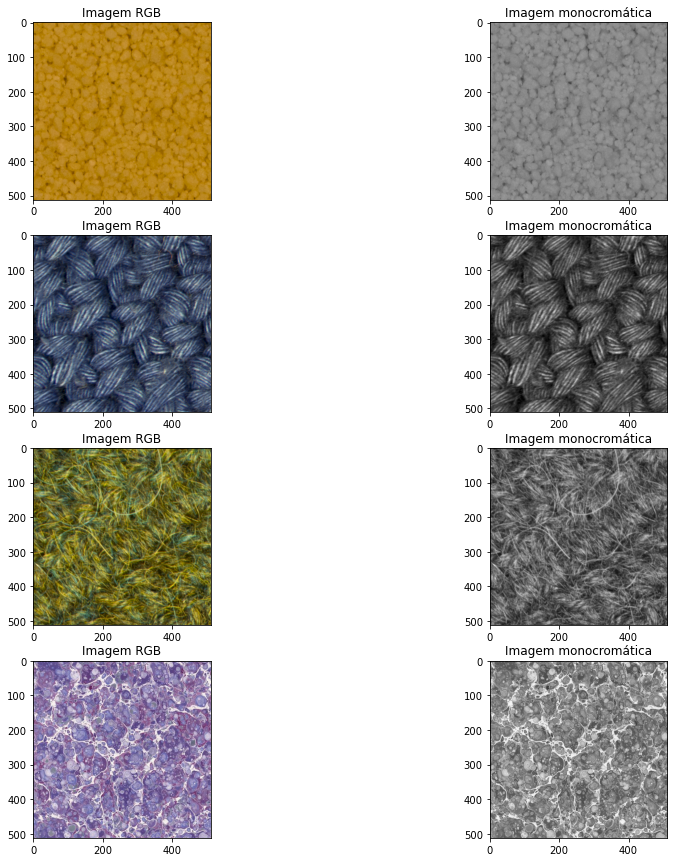

In [3]:
plt.figure(figsize=(15,15))

plt.subplot(421)
plt.imshow(cv2.cvtColor(text_1, cv2.COLOR_BGR2RGB))
plt.title('Imagem RGB')
plt.subplot(422)
plt.imshow(gray_1,cmap='gray', vmin=0, vmax=255)
plt.title('Imagem monocromática')

plt.subplot(423)
plt.imshow(cv2.cvtColor(text_2, cv2.COLOR_BGR2RGB))
plt.title('Imagem RGB')
plt.subplot(424)
plt.imshow(gray_2,cmap='gray', vmin=0, vmax=255)
plt.title('Imagem monocromática')

plt.subplot(425)
plt.imshow(cv2.cvtColor(text_3, cv2.COLOR_BGR2RGB))
plt.title('Imagem RGB')
plt.subplot(426)
plt.imshow(gray_3,cmap='gray', vmin=0, vmax=255)
plt.title('Imagem monocromática')

plt.subplot(427)
plt.imshow(cv2.cvtColor(text_4, cv2.COLOR_BGR2RGB))
plt.title('Imagem RGB')
plt.subplot(428)
plt.imshow(gray_4,cmap='gray', vmin=0, vmax=255)
plt.title('Imagem monocromática')

plt.show()

### Padrões binários locais

Apresentar os padroes binários locais para algumas imagens utilizadas nos experimentos. A Figura 2 mostra os padroes binários locais para as texturas anteriores. Diferentes parâmetros associados ao descritor podem ser testados e avaliados.

In [4]:
import numpy as np
from skimage import io, color
from skimage.feature import local_binary_pattern

def lbp_histogram(img, p=8, r=1):
    '''P -> Number of circularly symmetric neighbour set points
        R -> Radius of circle (space resolution of the operator)'''
    patterns = local_binary_pattern(img, p, r)
    n_bins = int(patterns.max() + 1)
    hist, _ = np.histogram(patterns, bins=n_bins, density=True, range=(0, n_bins))
    return hist, patterns

In [5]:
hist_1, patterns_1 = lbp_histogram(gray_1)
hist_2, patterns_2 = lbp_histogram(gray_2)
hist_3, patterns_3 = lbp_histogram(gray_3)
hist_4, patterns_4 = lbp_histogram(gray_4)


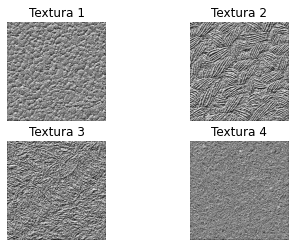

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image_grid(images, n_texture, ncols=None, cmap='gray'):
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 2*nrows))
    axes = axes.flatten()[:len(imgs)]
    aux = 0
    for img, ax in zip(imgs, axes.flatten()): 
        aux += 1
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
            ax.set_title(n_texture + " " + str(aux))
            ax.axis('off')
            ax.imshow(img, cmap=cmap)
            

plot_image_grid([patterns_1, patterns_2, patterns_3, patterns_4], "Textura", ncols=None, cmap='gray')


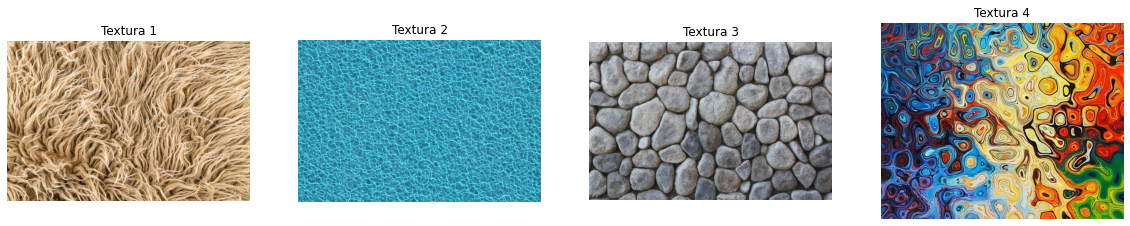

Number of points p: 1, radius: 1
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


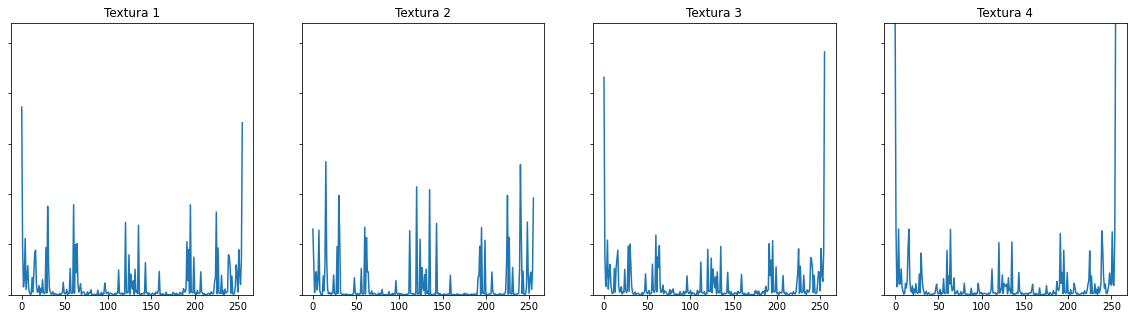

----------------------------------------------------------------
Number of points p: 1, radius: 2
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


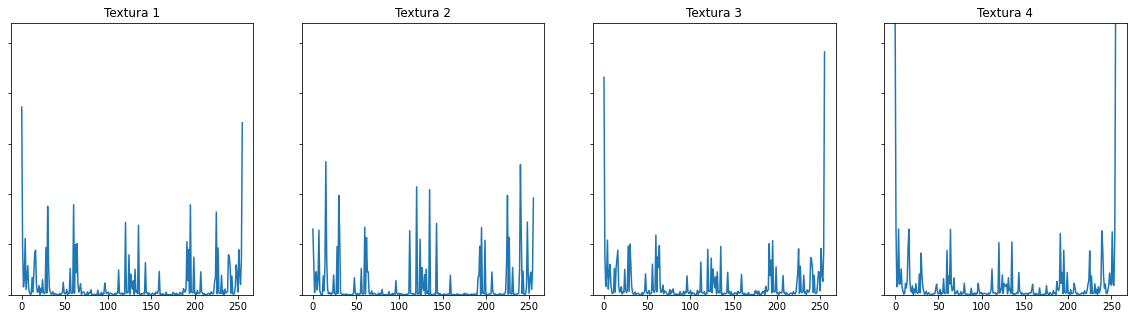

----------------------------------------------------------------
Number of points p: 1, radius: 3
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


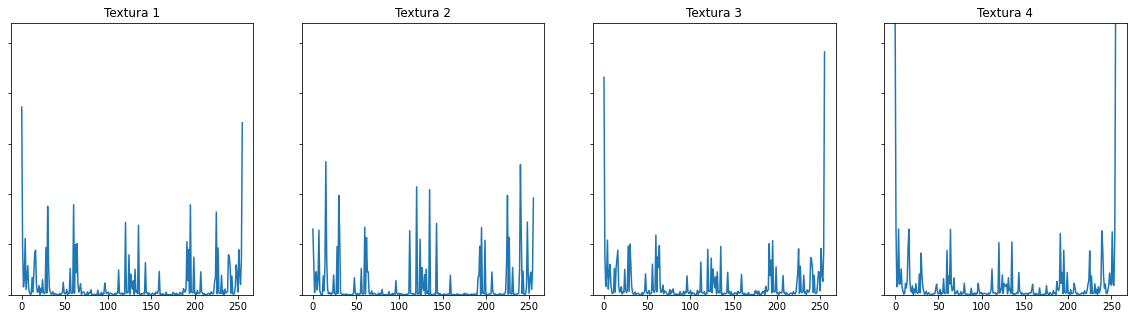

----------------------------------------------------------------
Number of points p: 1, radius: 4
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


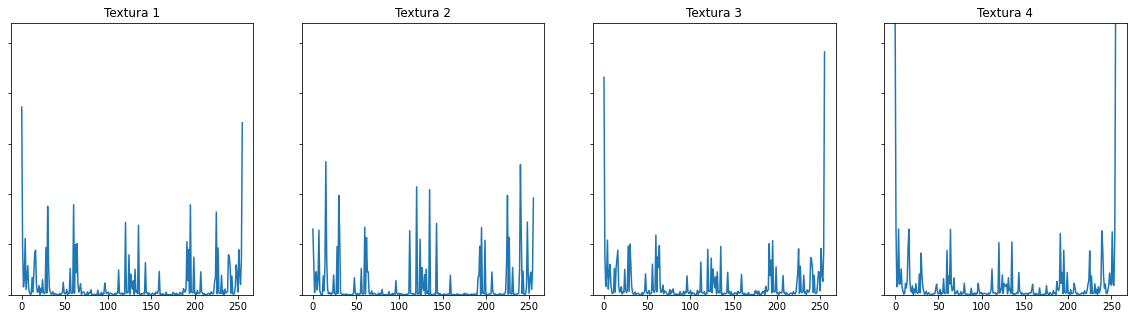

----------------------------------------------------------------
Number of points p: 1, radius: 5
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


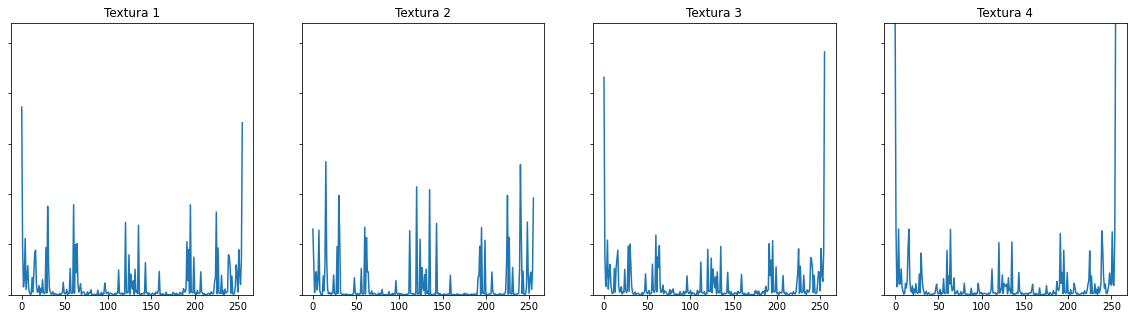

----------------------------------------------------------------
Number of points p: 1, radius: 6
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


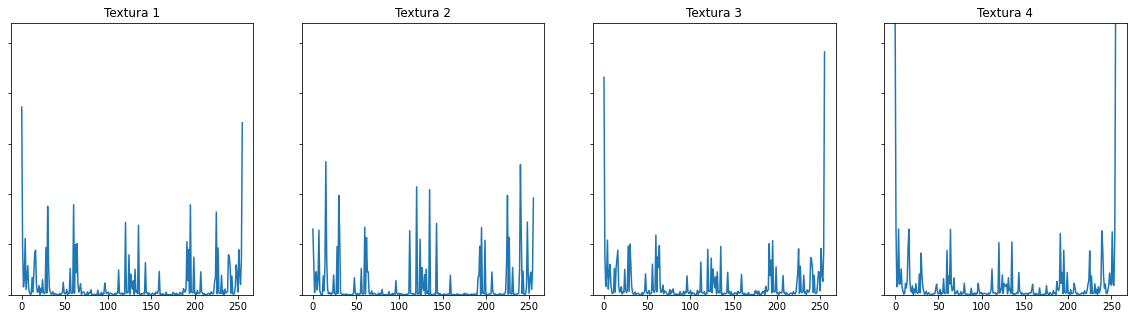

----------------------------------------------------------------
Number of points p: 1, radius: 7
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


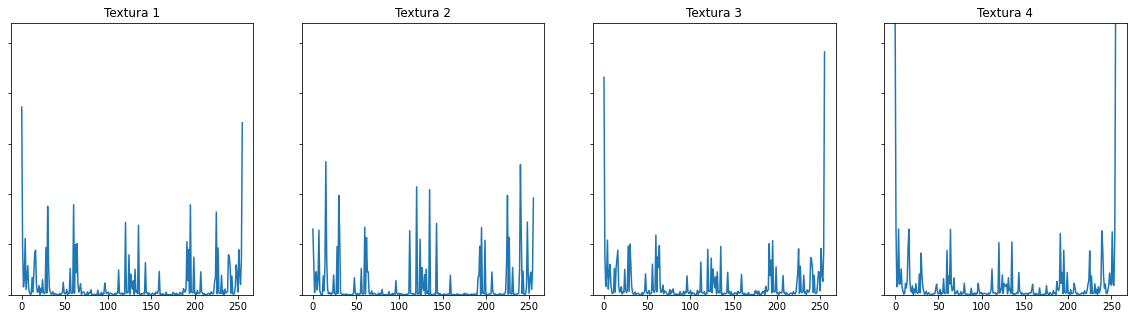

----------------------------------------------------------------
Number of points p: 1, radius: 8
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


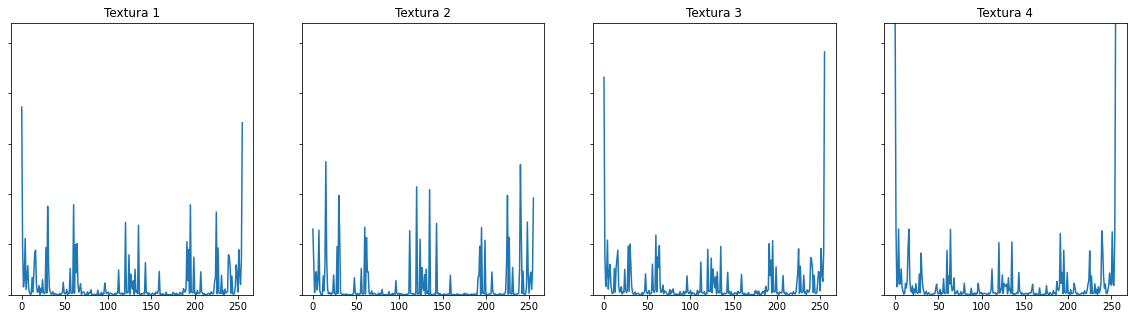

----------------------------------------------------------------
Number of points p: 1, radius: 9
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


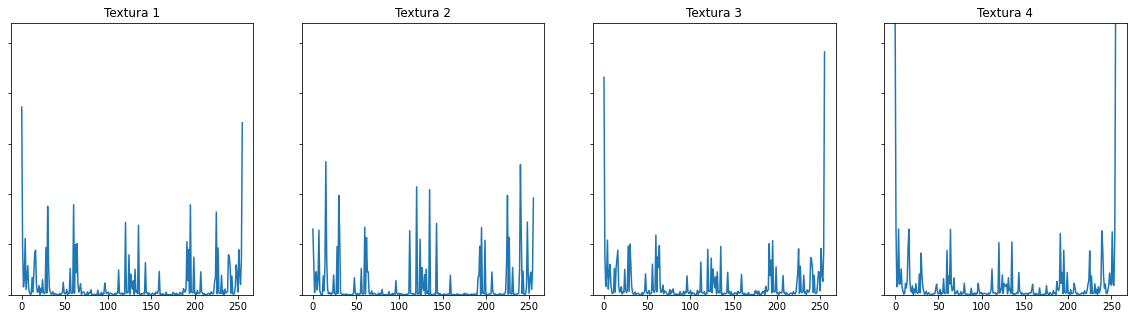

----------------------------------------------------------------
Number of points p: 1, radius: 10
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


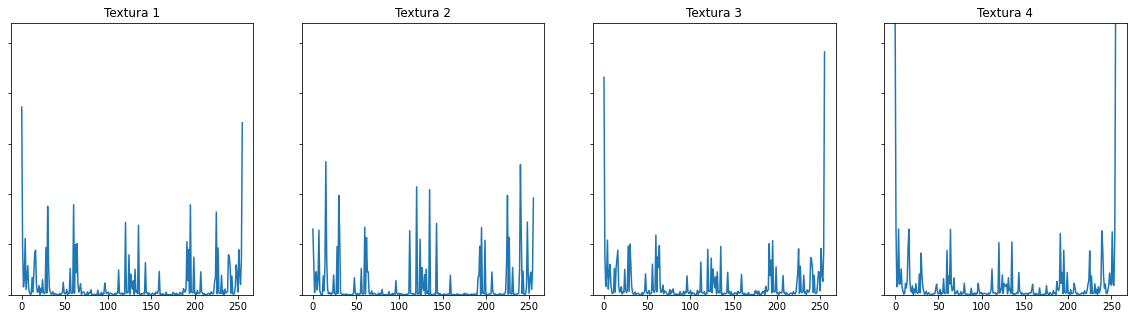

----------------------------------------------------------------
Number of points p: 2, radius: 1
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


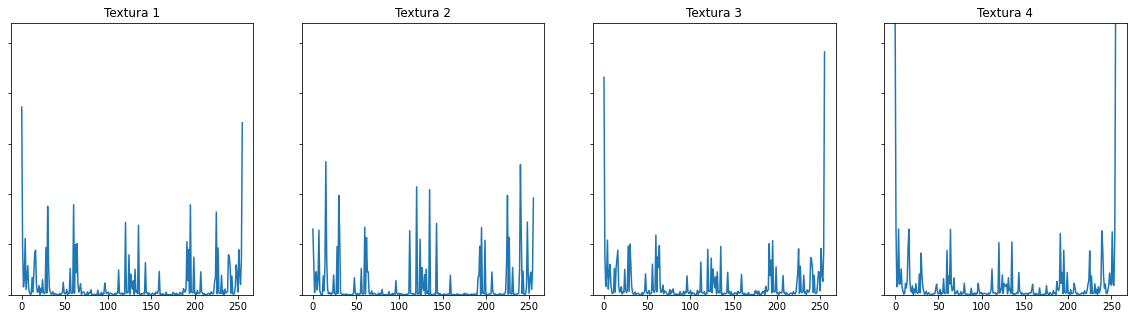

----------------------------------------------------------------
Number of points p: 2, radius: 2
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


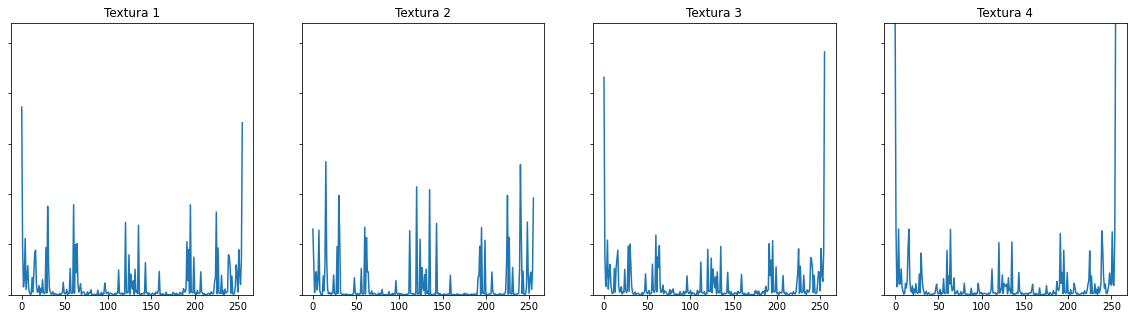

----------------------------------------------------------------
Number of points p: 2, radius: 3
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


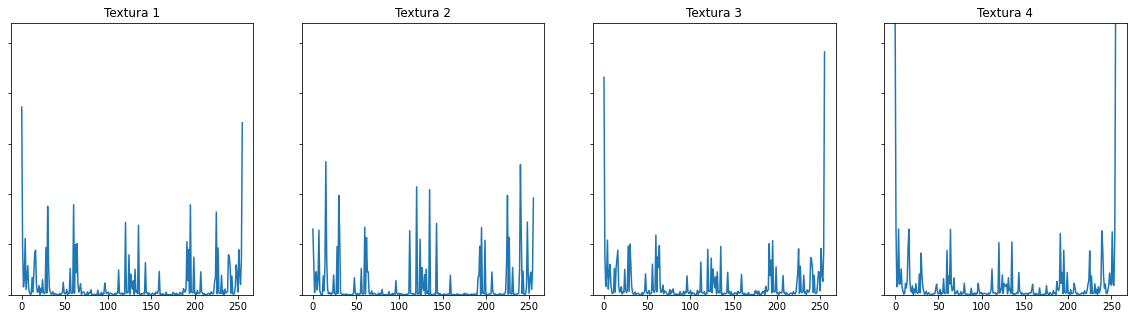

----------------------------------------------------------------
Number of points p: 2, radius: 4
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


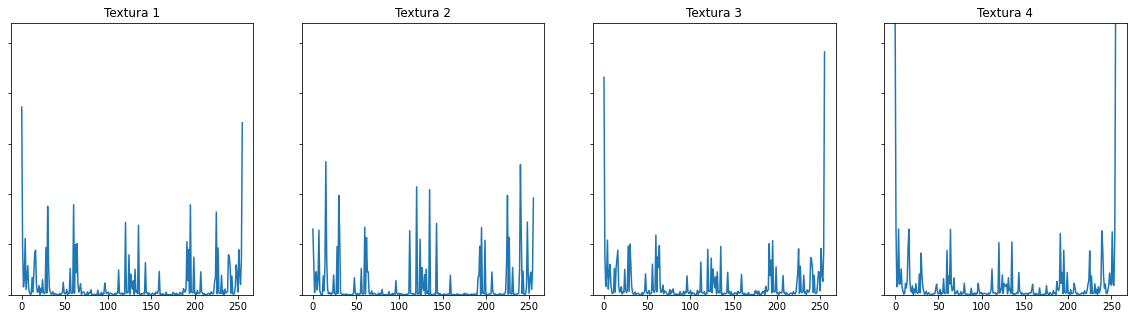

----------------------------------------------------------------
Number of points p: 2, radius: 5
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


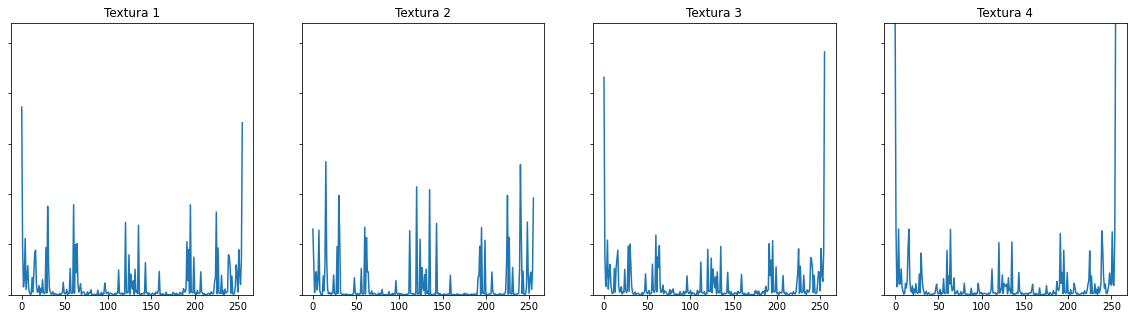

----------------------------------------------------------------
Number of points p: 2, radius: 6
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


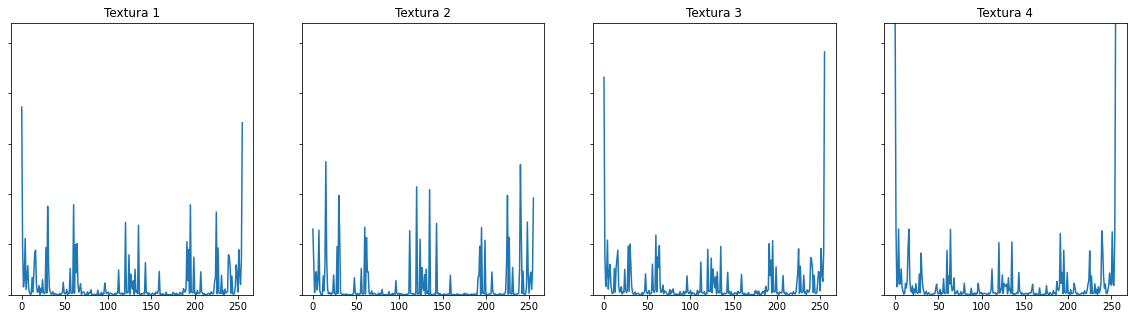

----------------------------------------------------------------
Number of points p: 2, radius: 7
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


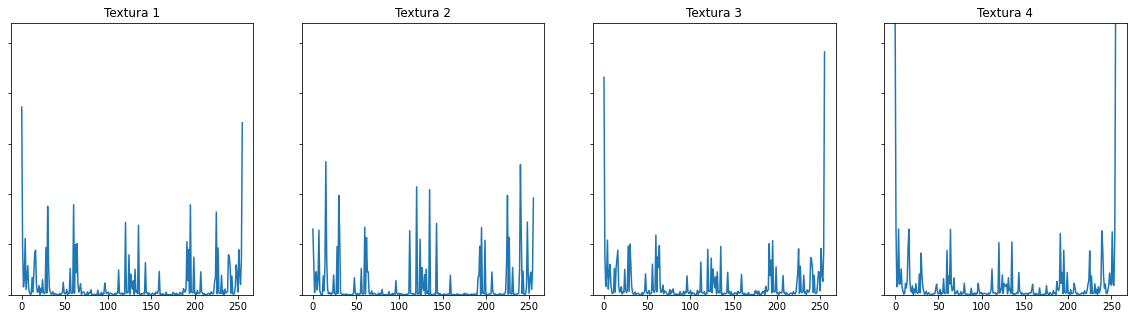

----------------------------------------------------------------
Number of points p: 2, radius: 8
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


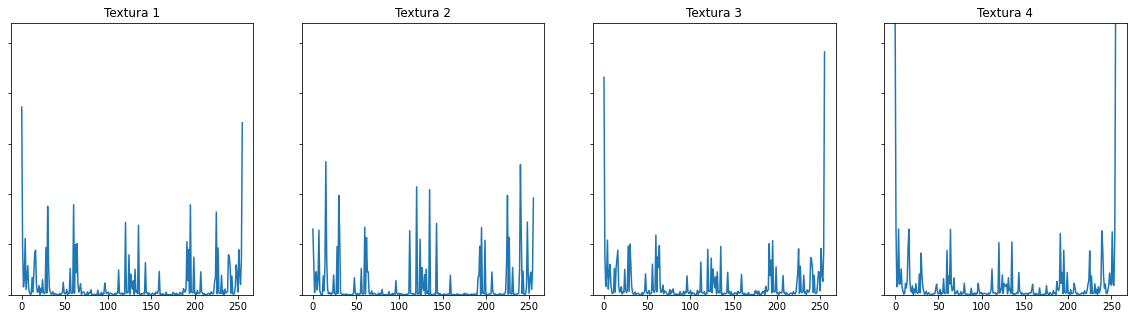

----------------------------------------------------------------
Number of points p: 2, radius: 9
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


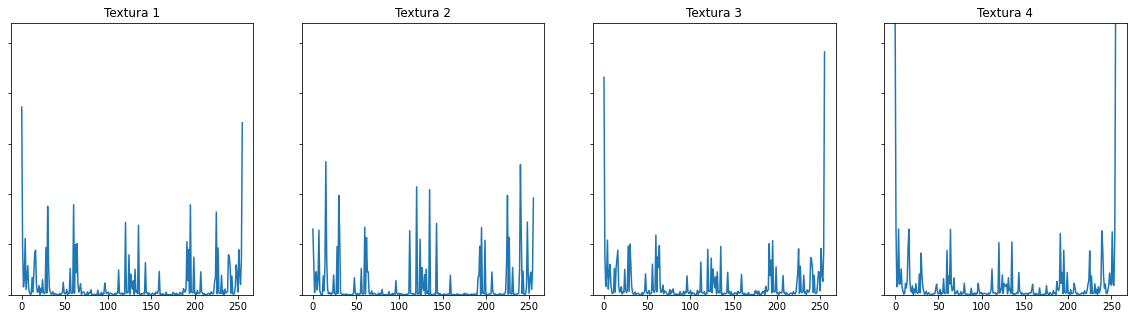

----------------------------------------------------------------
Number of points p: 2, radius: 10
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


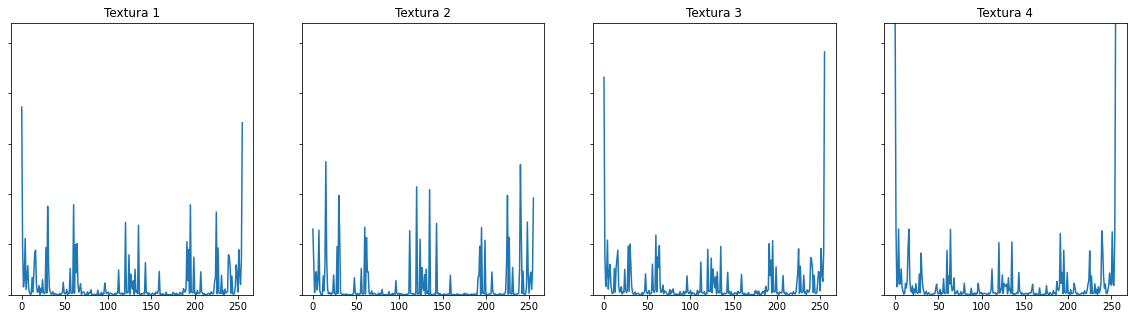

----------------------------------------------------------------
Number of points p: 3, radius: 1
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


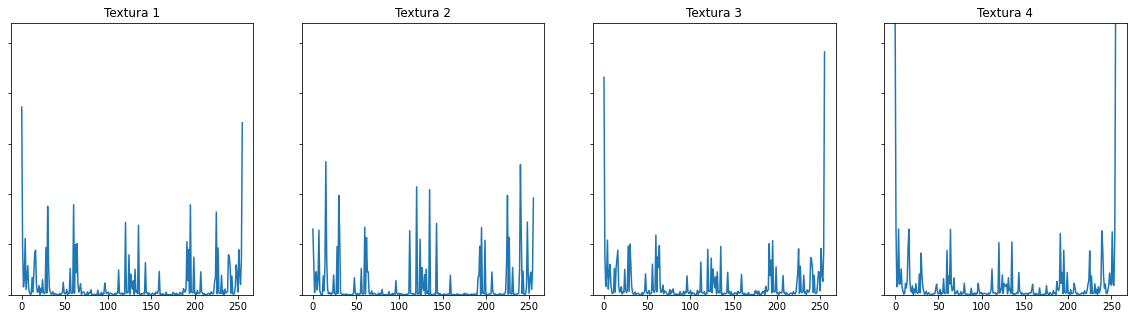

----------------------------------------------------------------
Number of points p: 3, radius: 2
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


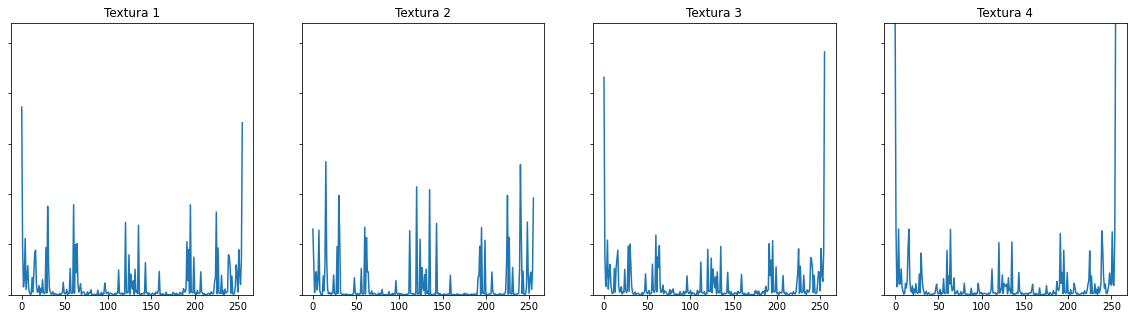

----------------------------------------------------------------
Number of points p: 3, radius: 3
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


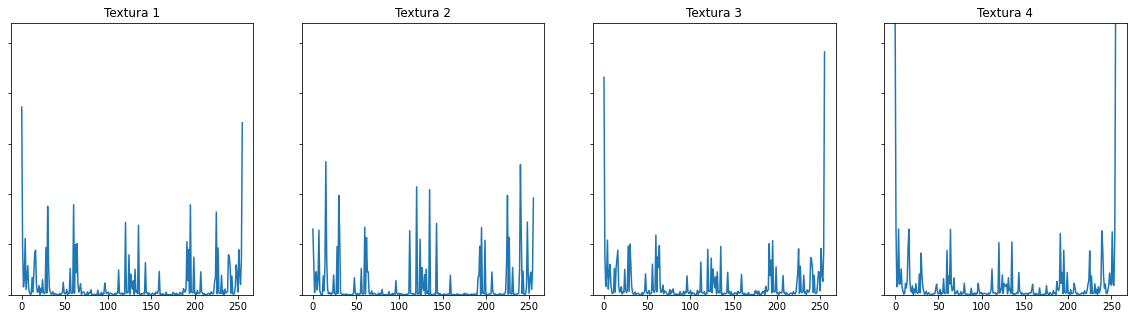

----------------------------------------------------------------
Number of points p: 3, radius: 4
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


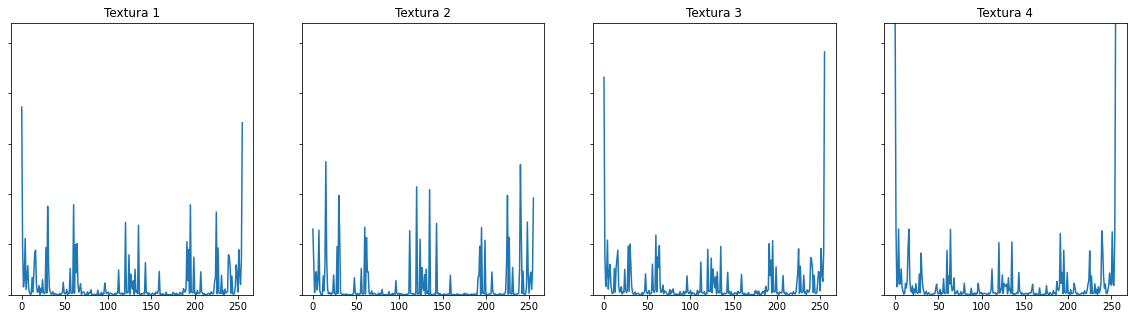

----------------------------------------------------------------
Number of points p: 3, radius: 5
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


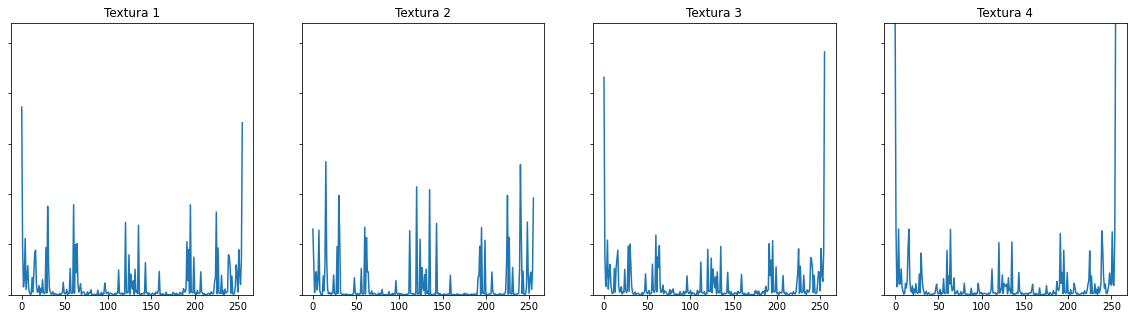

----------------------------------------------------------------
Number of points p: 3, radius: 6
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


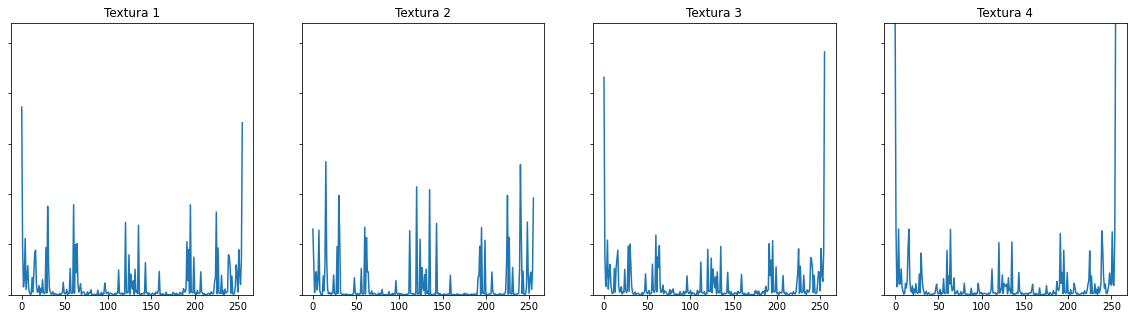

----------------------------------------------------------------
Number of points p: 3, radius: 7
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


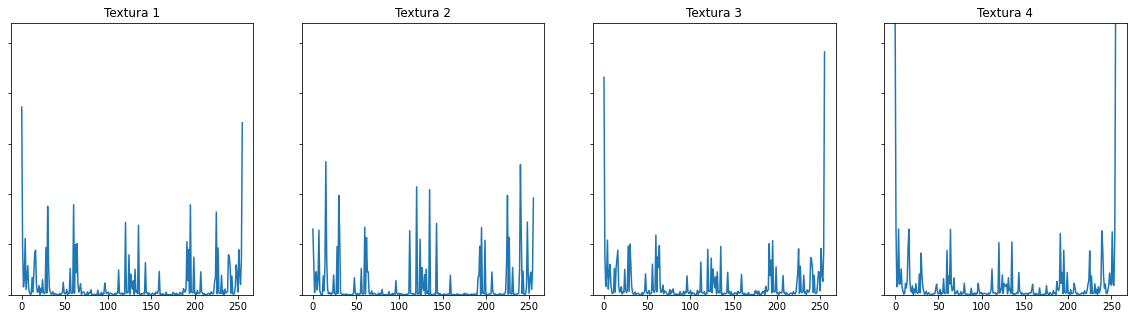

----------------------------------------------------------------
Number of points p: 3, radius: 8
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


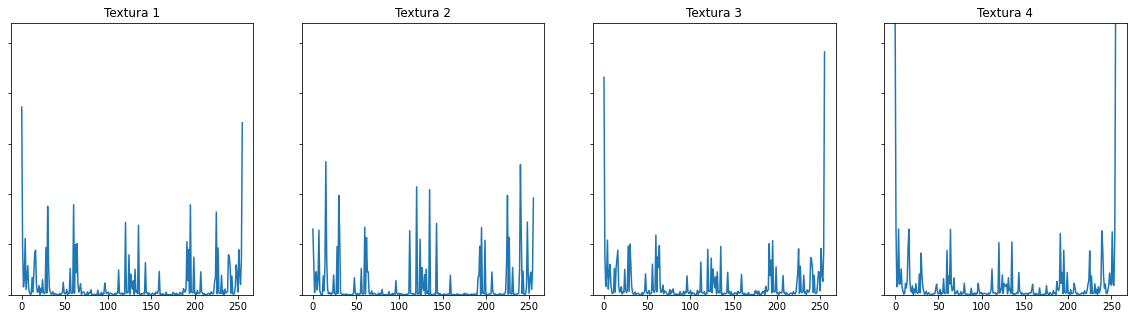

----------------------------------------------------------------
Number of points p: 3, radius: 9
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


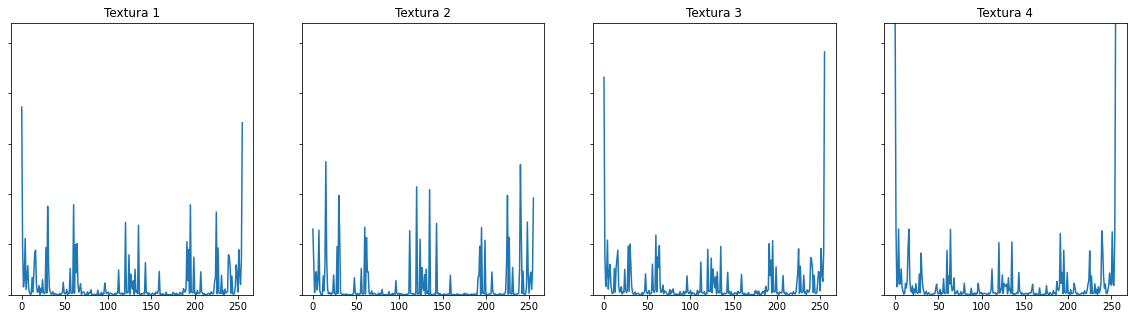

----------------------------------------------------------------
Number of points p: 3, radius: 10
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


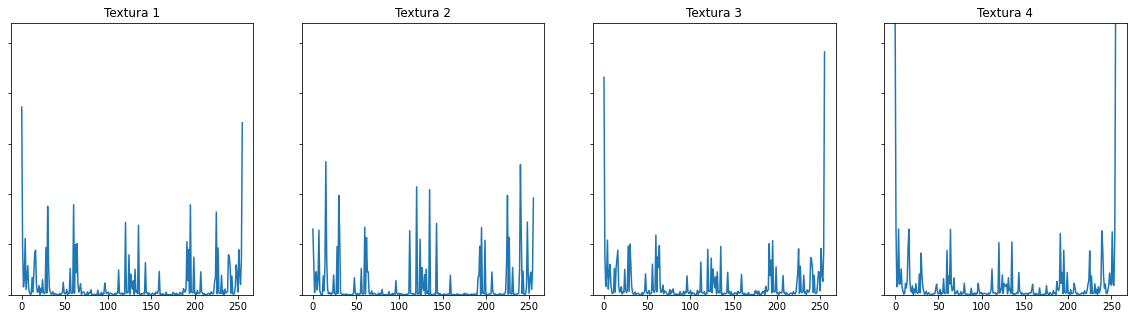

----------------------------------------------------------------
Number of points p: 4, radius: 1
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


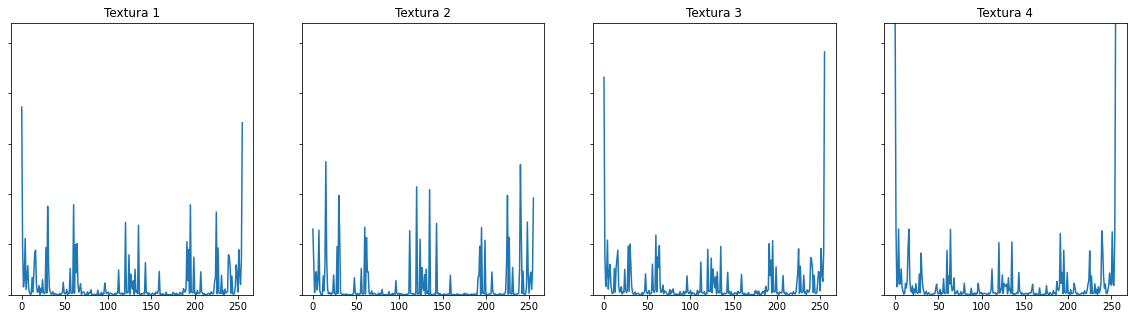

----------------------------------------------------------------
Number of points p: 4, radius: 2
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


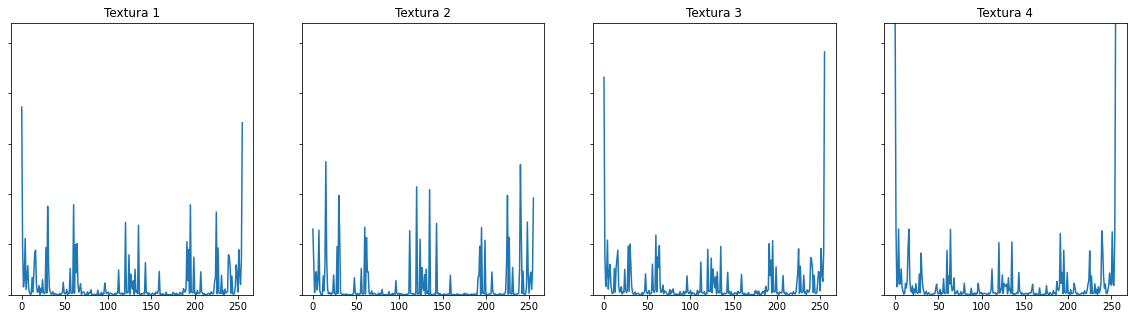

----------------------------------------------------------------
Number of points p: 4, radius: 3
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


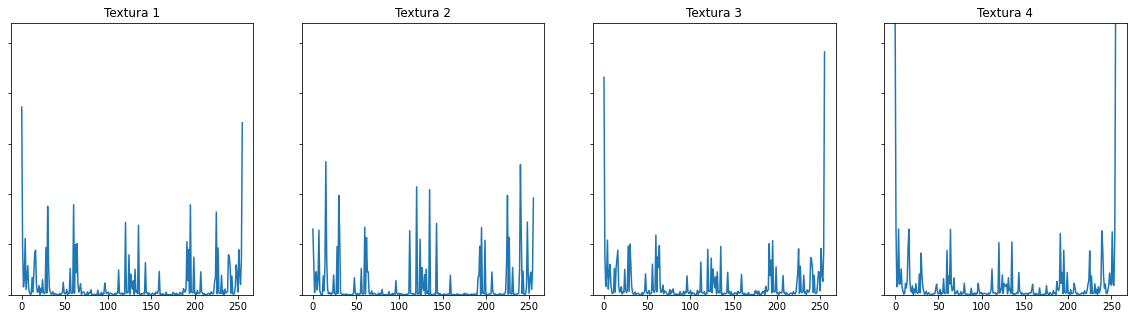

----------------------------------------------------------------
Number of points p: 4, radius: 4
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


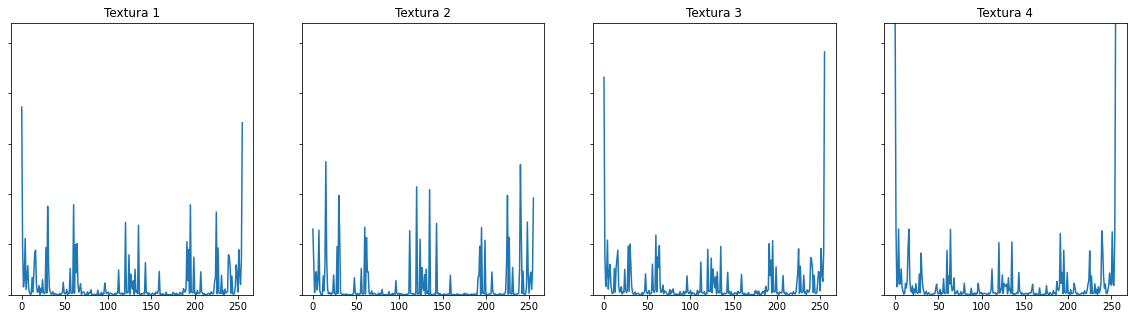

----------------------------------------------------------------
Number of points p: 4, radius: 5
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


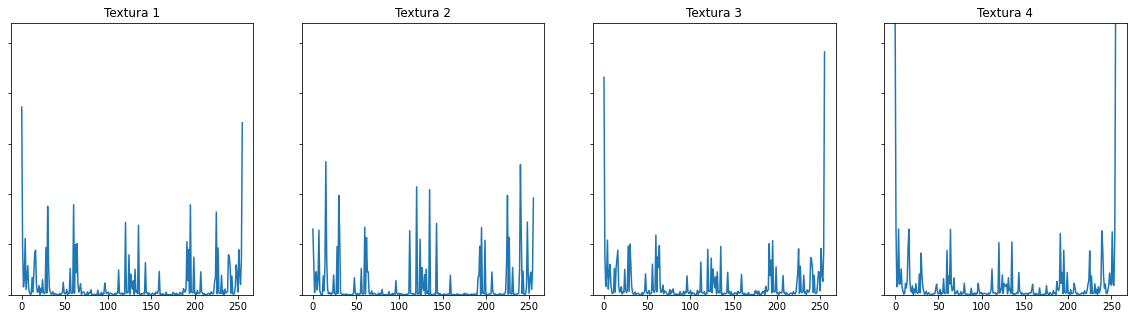

----------------------------------------------------------------
Number of points p: 4, radius: 6
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


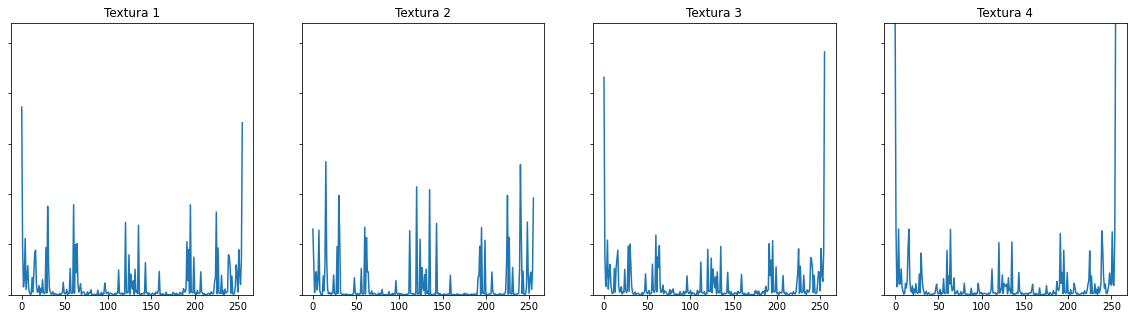

----------------------------------------------------------------
Number of points p: 4, radius: 7
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


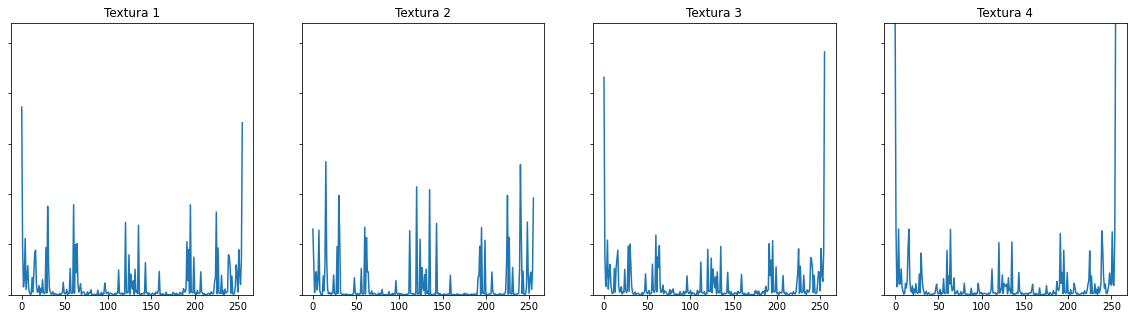

----------------------------------------------------------------
Number of points p: 4, radius: 8
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


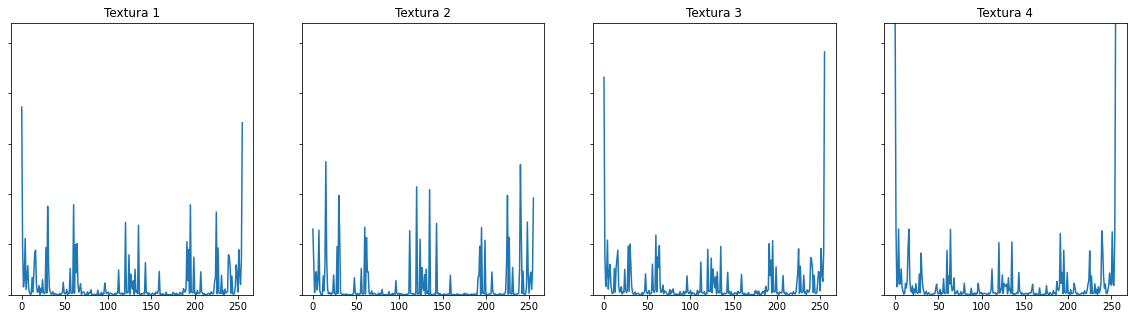

----------------------------------------------------------------
Number of points p: 4, radius: 9
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


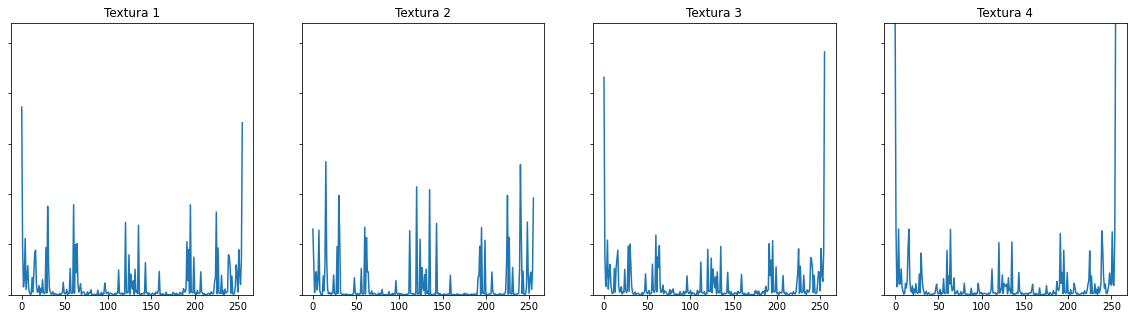

----------------------------------------------------------------
Number of points p: 4, radius: 10
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


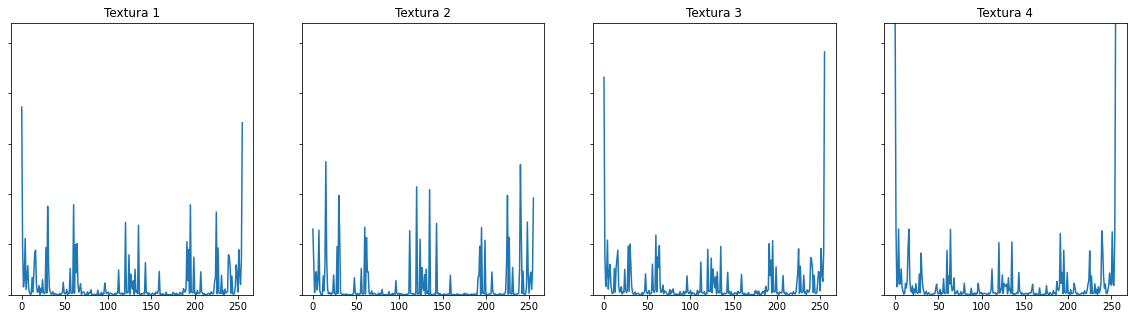

----------------------------------------------------------------
Number of points p: 5, radius: 1
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


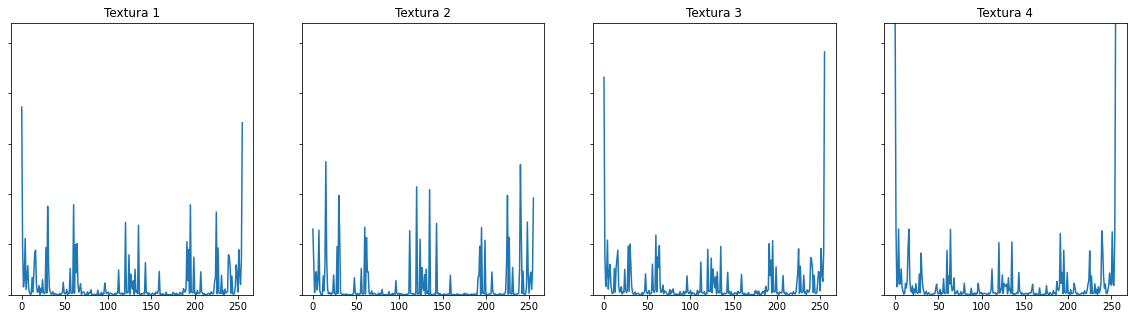

----------------------------------------------------------------
Number of points p: 5, radius: 2
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


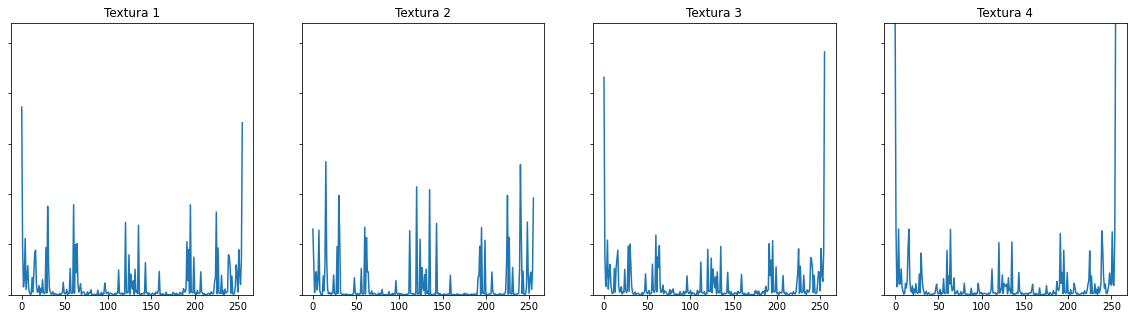

----------------------------------------------------------------
Number of points p: 5, radius: 3
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


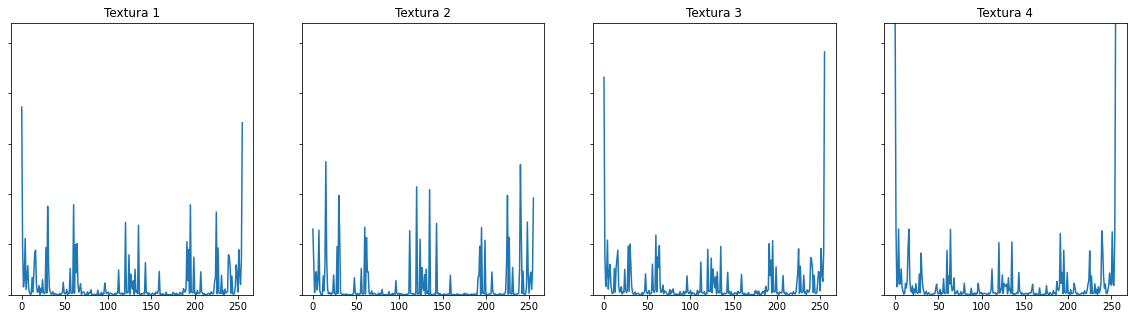

----------------------------------------------------------------
Number of points p: 5, radius: 4
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


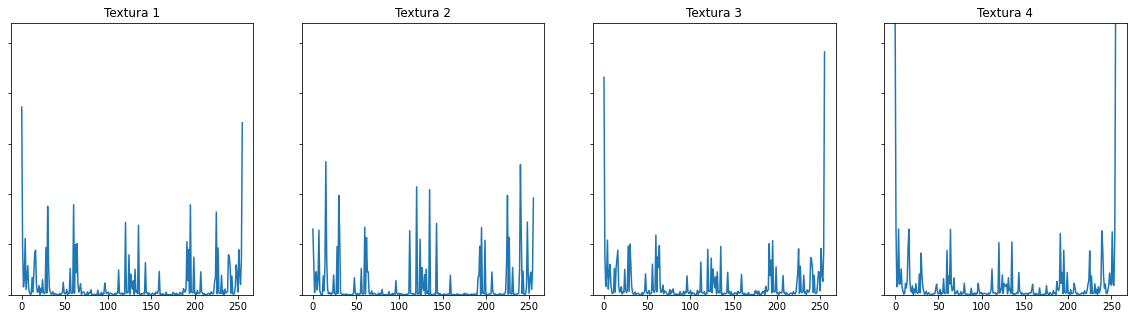

----------------------------------------------------------------
Number of points p: 5, radius: 5
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


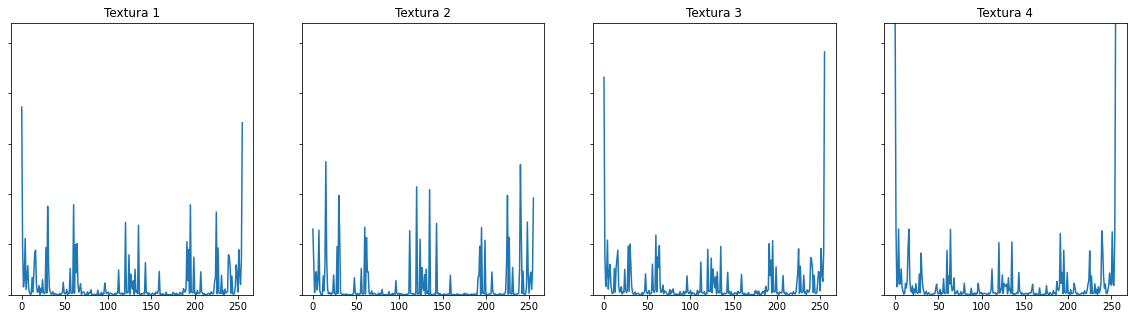

----------------------------------------------------------------
Number of points p: 5, radius: 6
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


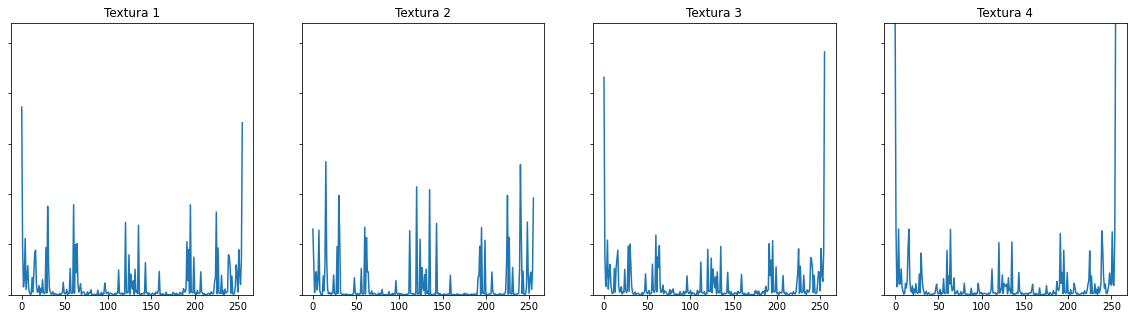

----------------------------------------------------------------
Number of points p: 5, radius: 7
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


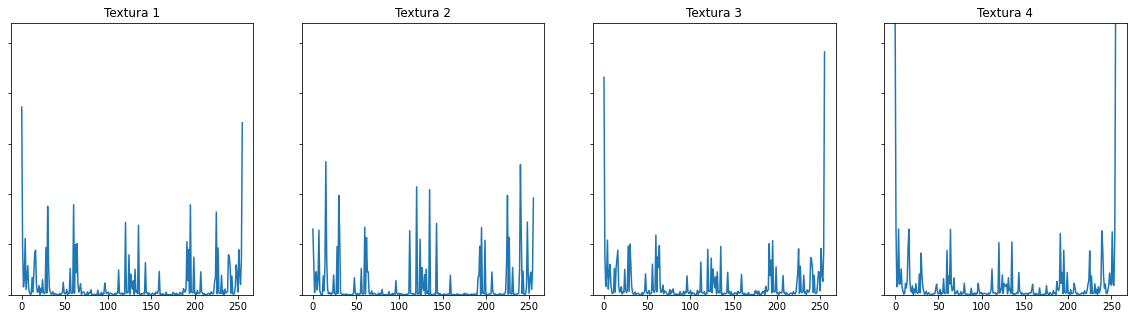

----------------------------------------------------------------
Number of points p: 5, radius: 8
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


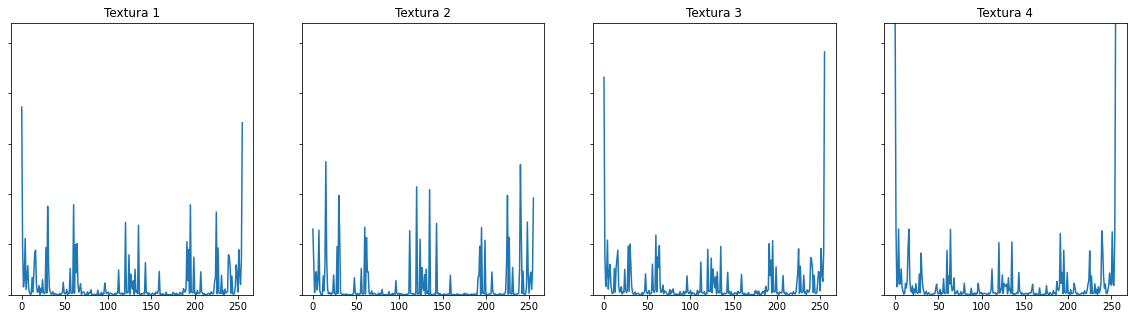

----------------------------------------------------------------
Number of points p: 5, radius: 9
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


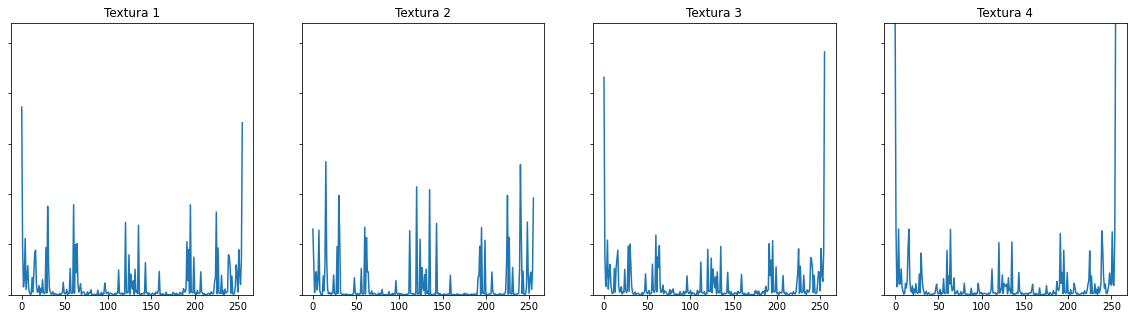

----------------------------------------------------------------
Number of points p: 5, radius: 10
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


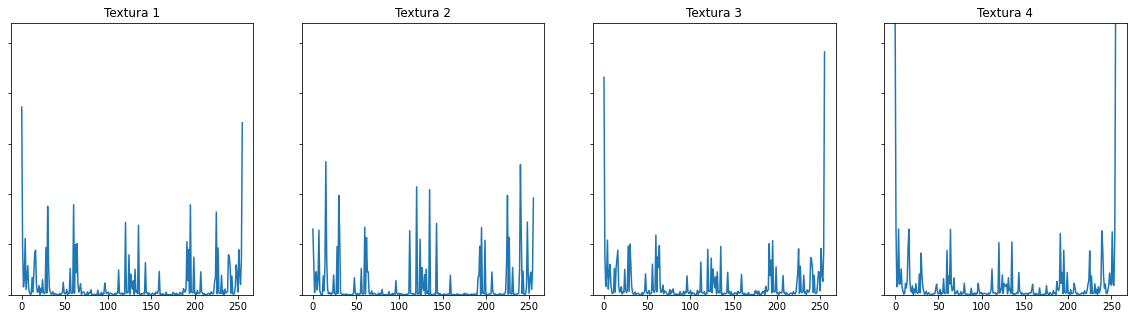

----------------------------------------------------------------
Number of points p: 6, radius: 1
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


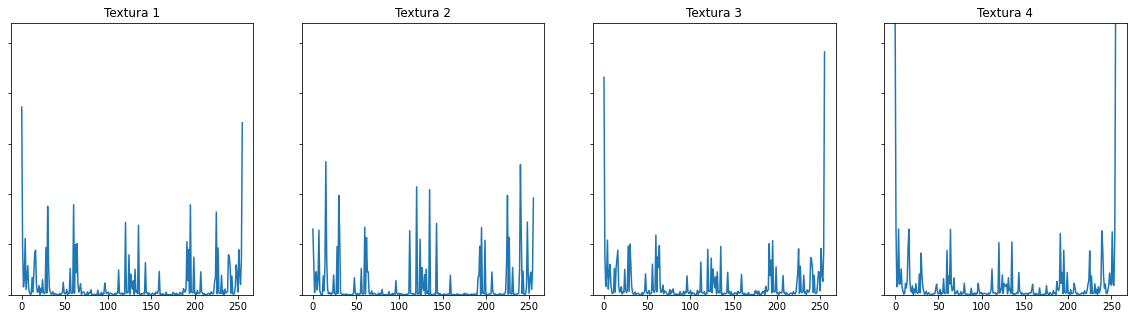

----------------------------------------------------------------
Number of points p: 6, radius: 2
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


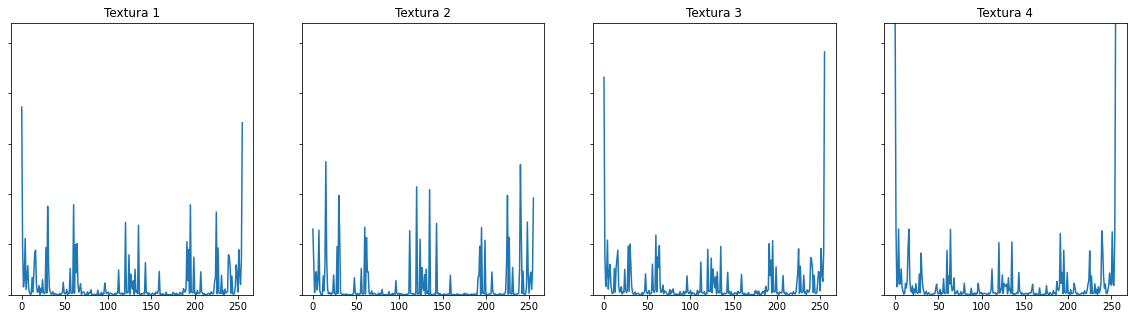

----------------------------------------------------------------
Number of points p: 6, radius: 3
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


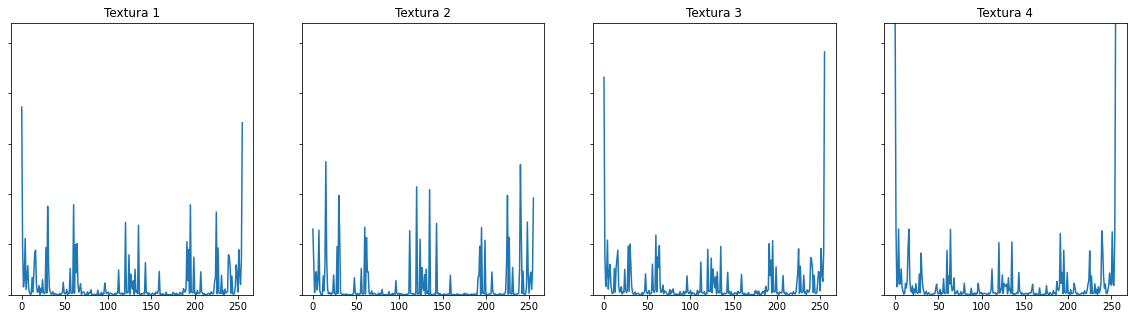

----------------------------------------------------------------
Number of points p: 6, radius: 4
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


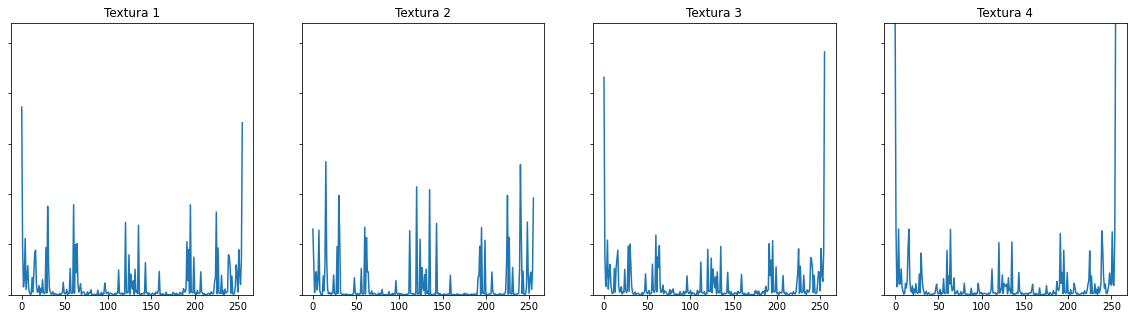

----------------------------------------------------------------
Number of points p: 6, radius: 5
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


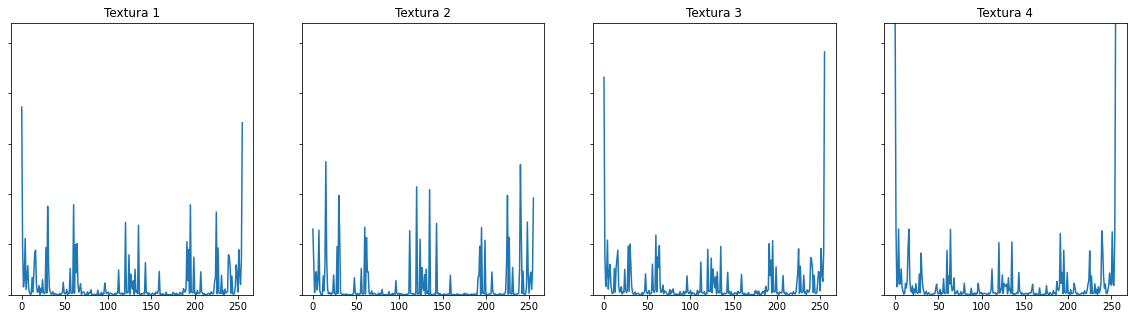

----------------------------------------------------------------
Number of points p: 6, radius: 6
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


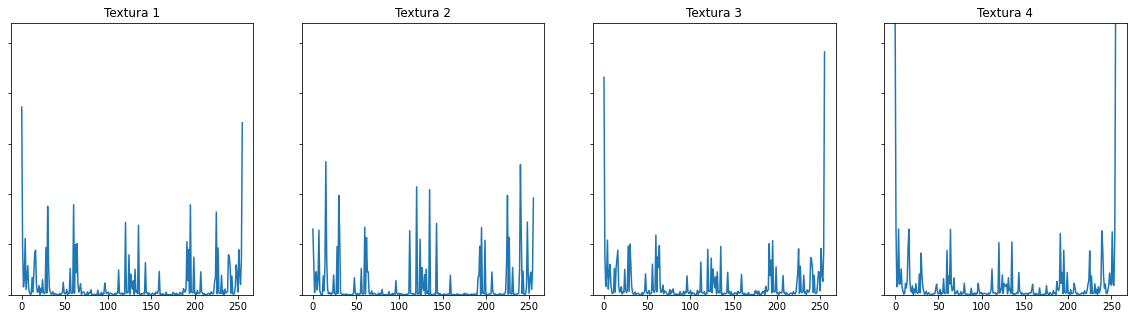

----------------------------------------------------------------
Number of points p: 6, radius: 7
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


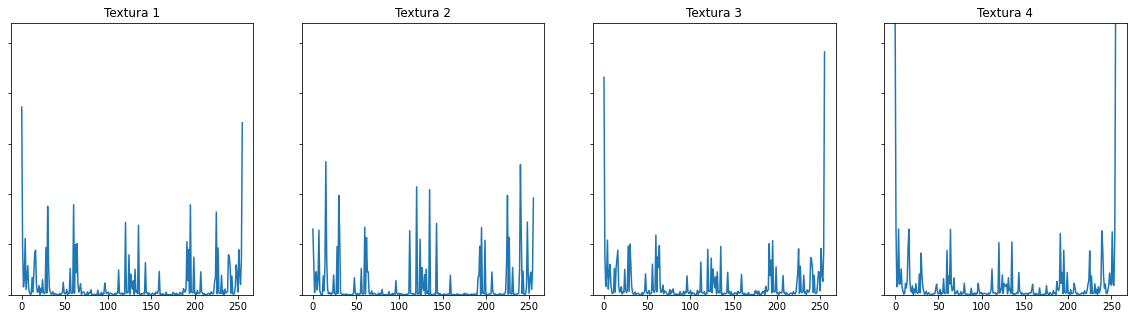

----------------------------------------------------------------
Number of points p: 6, radius: 8
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


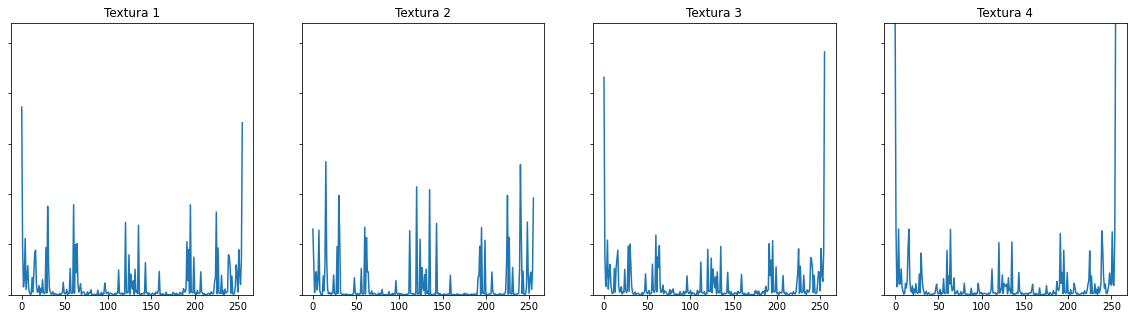

----------------------------------------------------------------
Number of points p: 6, radius: 9
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


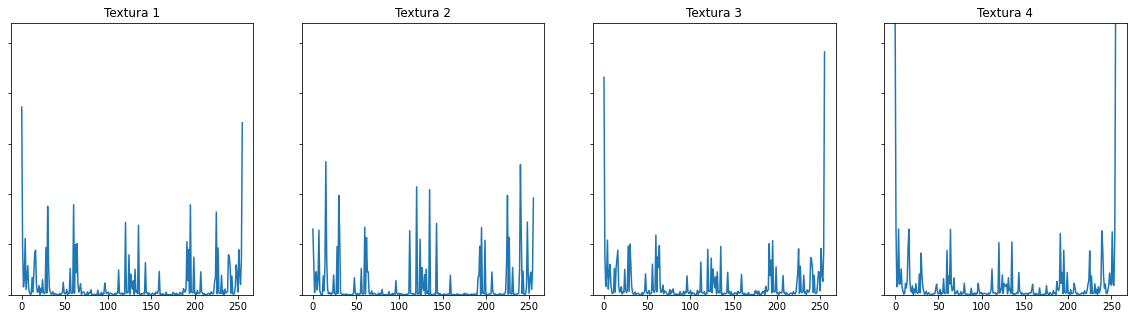

----------------------------------------------------------------
Number of points p: 6, radius: 10
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


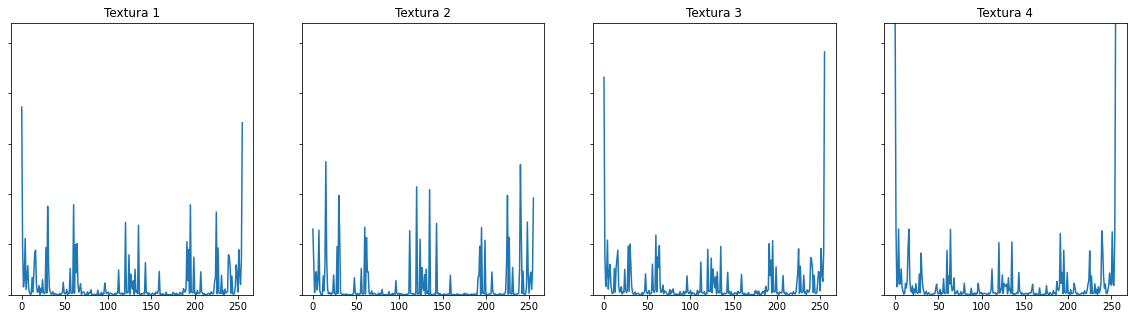

----------------------------------------------------------------
Number of points p: 7, radius: 1
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


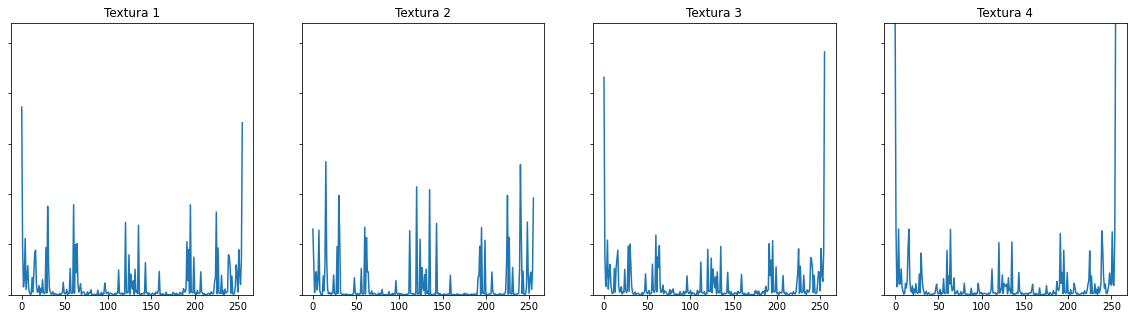

----------------------------------------------------------------
Number of points p: 7, radius: 2
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


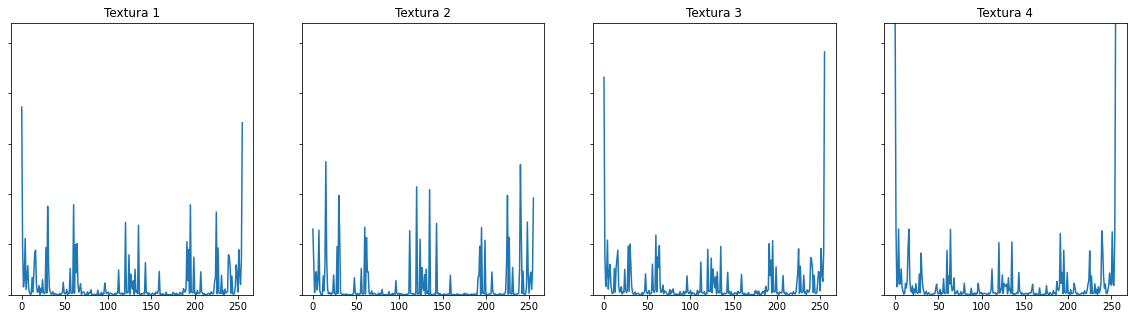

----------------------------------------------------------------
Number of points p: 7, radius: 3
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


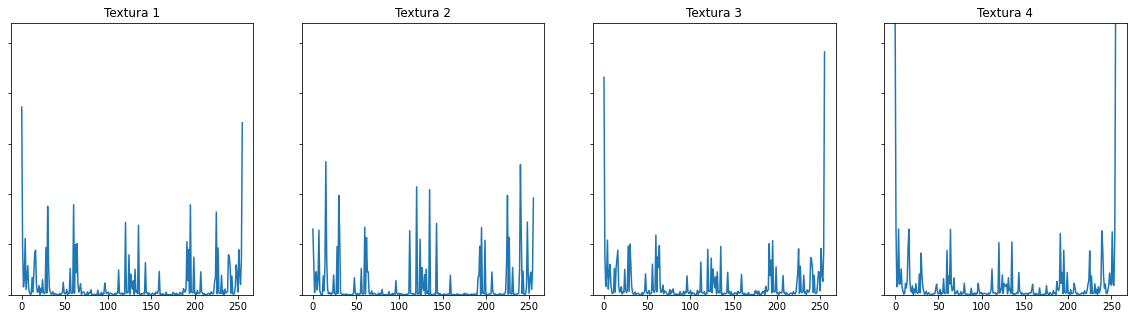

----------------------------------------------------------------
Number of points p: 7, radius: 4
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


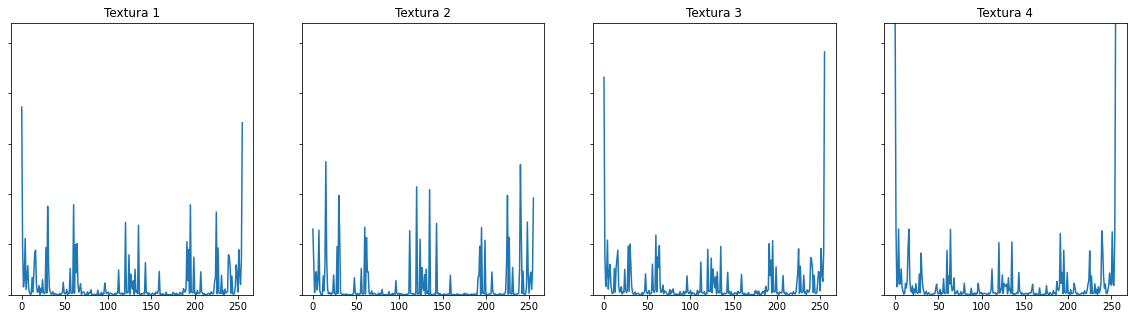

----------------------------------------------------------------
Number of points p: 7, radius: 5
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


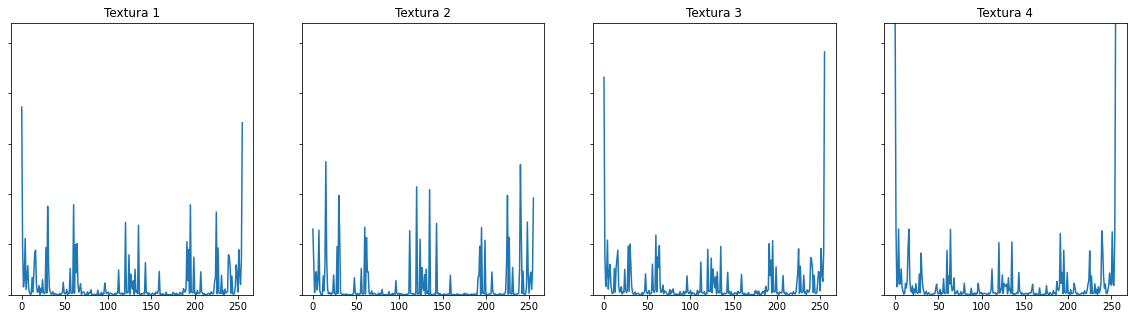

----------------------------------------------------------------
Number of points p: 7, radius: 6
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


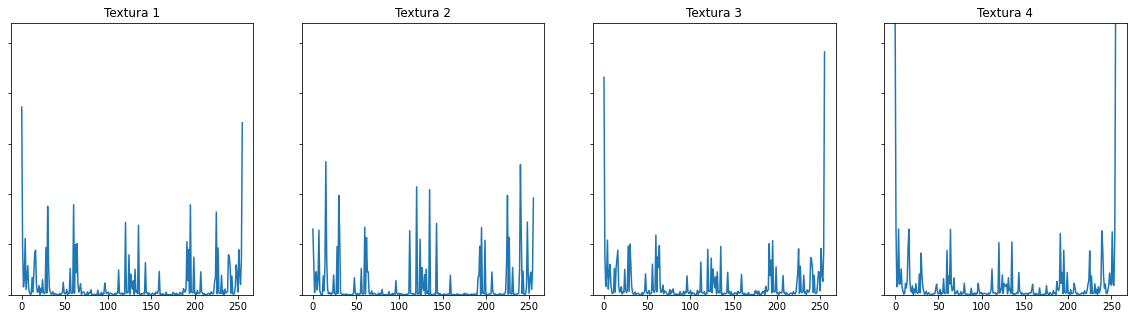

----------------------------------------------------------------
Number of points p: 7, radius: 7
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


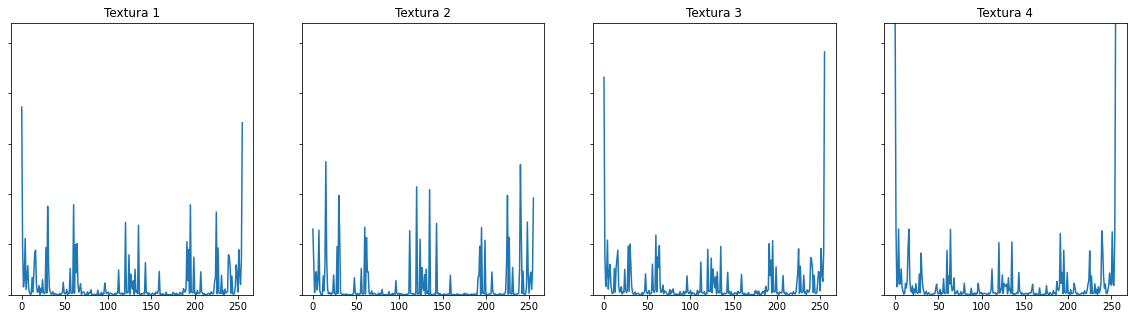

----------------------------------------------------------------
Number of points p: 7, radius: 8
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


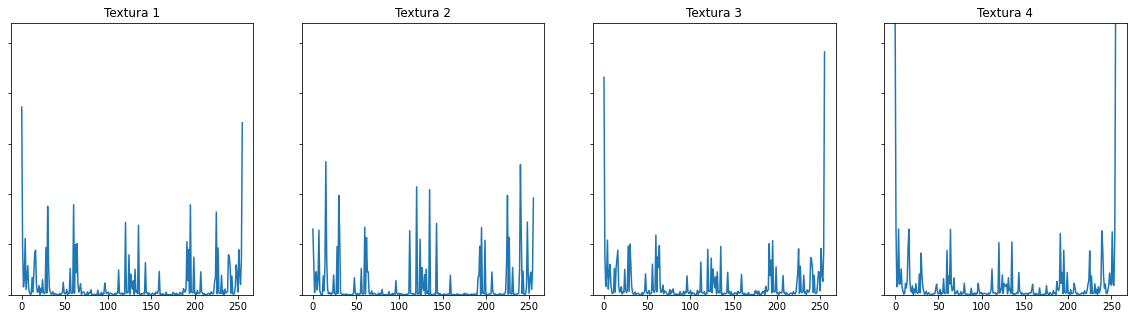

----------------------------------------------------------------
Number of points p: 7, radius: 9
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


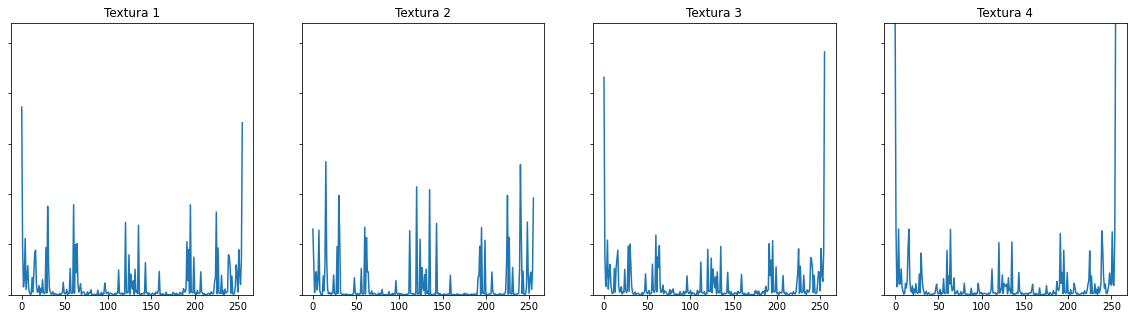

----------------------------------------------------------------
Number of points p: 7, radius: 10
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


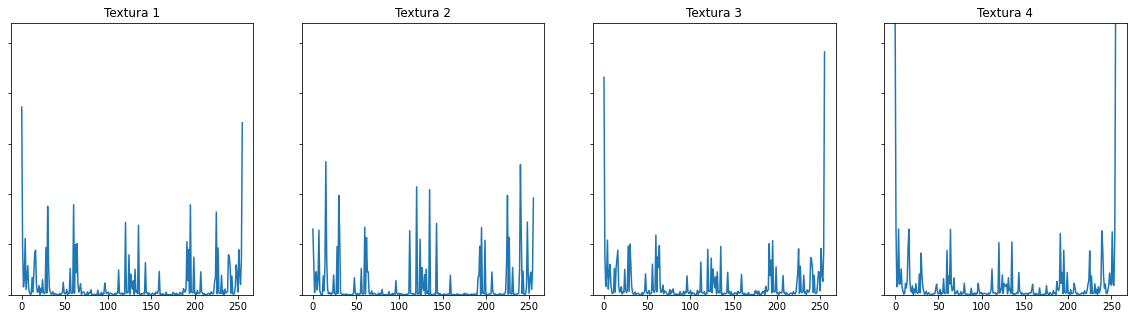

----------------------------------------------------------------
Number of points p: 8, radius: 1
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


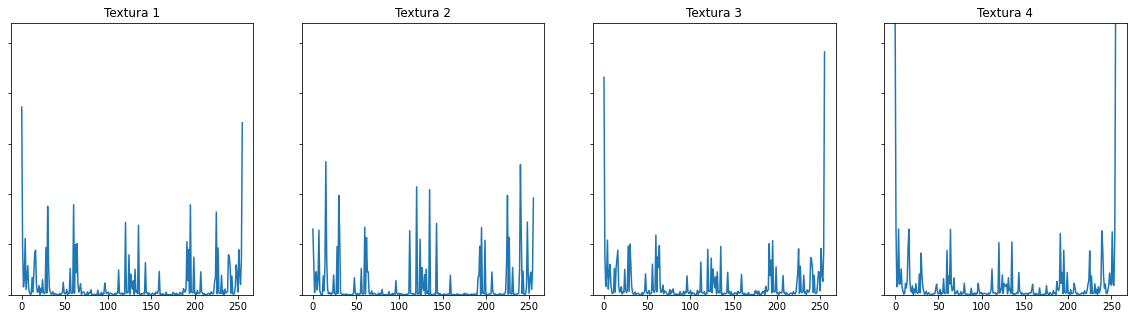

----------------------------------------------------------------
Number of points p: 8, radius: 2
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


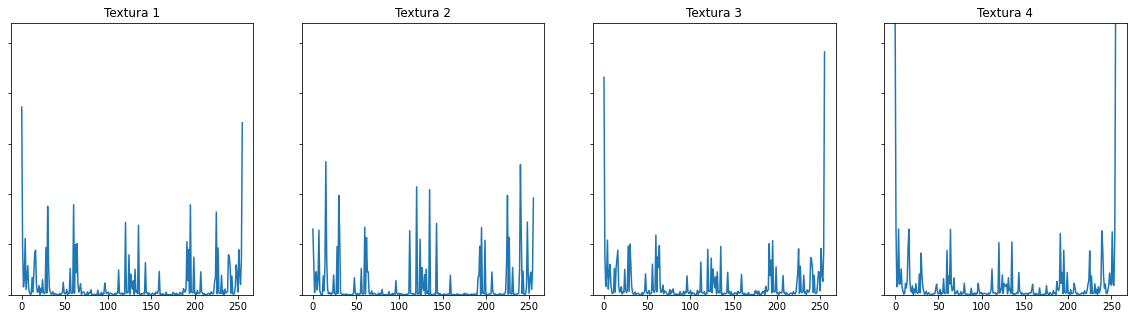

----------------------------------------------------------------
Number of points p: 8, radius: 3
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


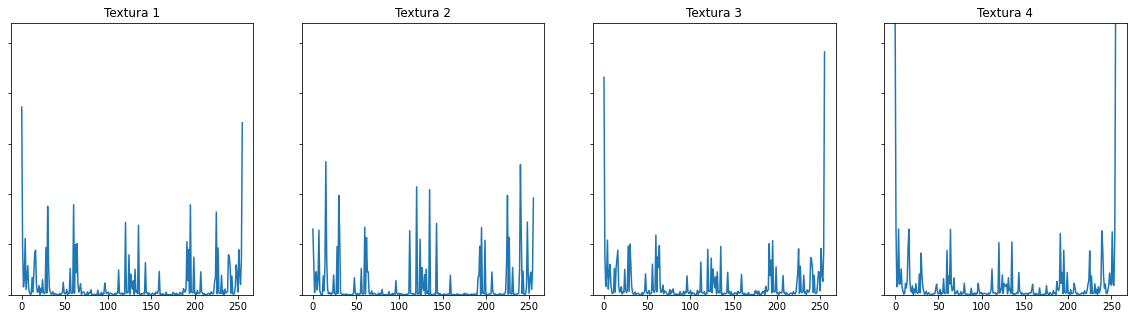

----------------------------------------------------------------
Number of points p: 8, radius: 4
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


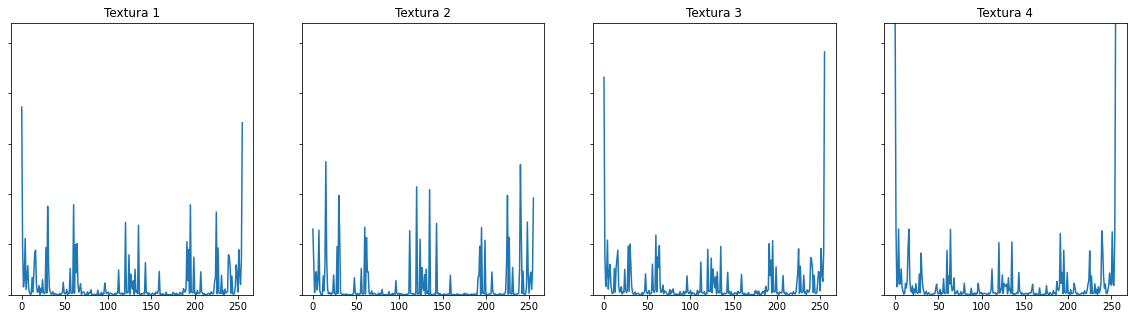

----------------------------------------------------------------
Number of points p: 8, radius: 5
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


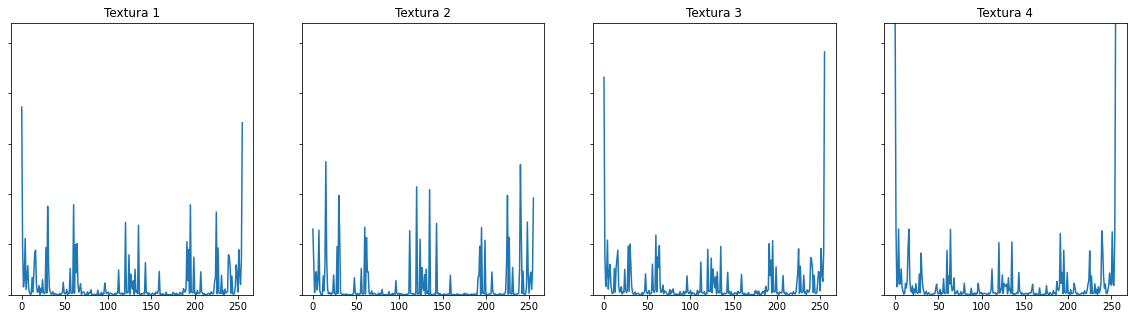

----------------------------------------------------------------
Number of points p: 8, radius: 6
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


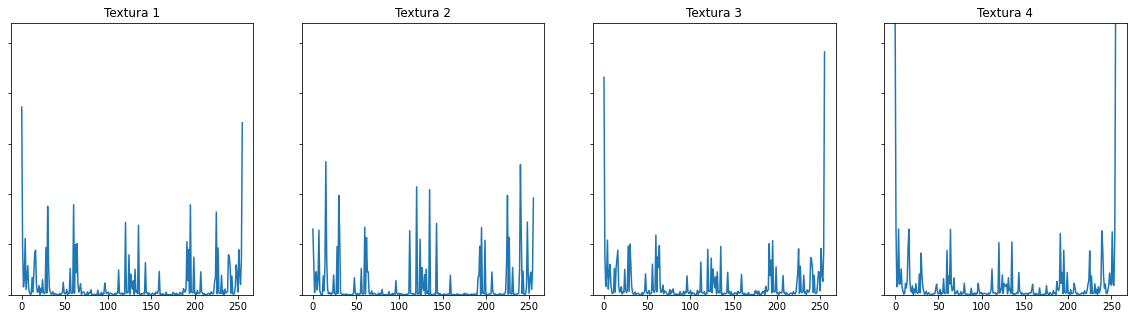

----------------------------------------------------------------
Number of points p: 8, radius: 7
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


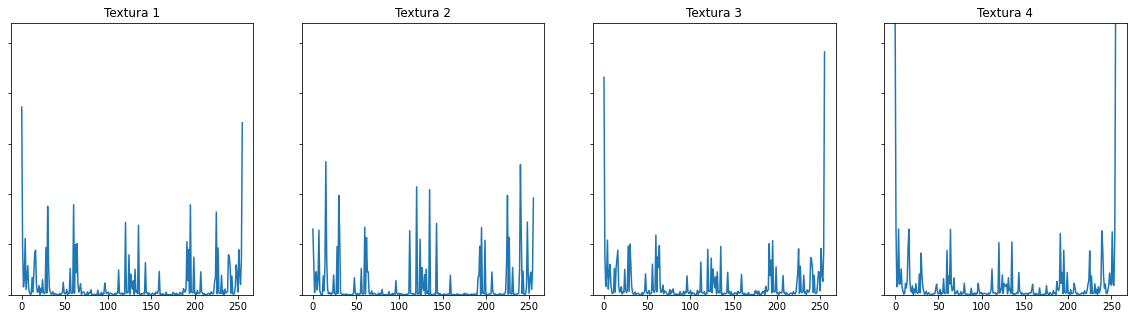

----------------------------------------------------------------
Number of points p: 8, radius: 8
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


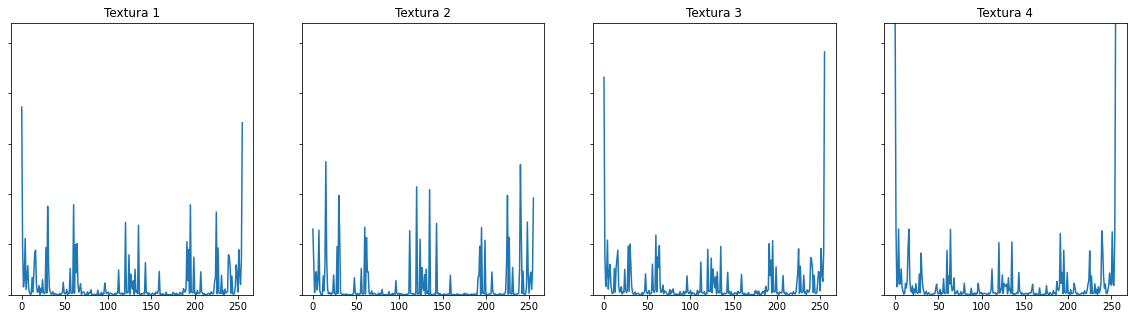

----------------------------------------------------------------
Number of points p: 8, radius: 9
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


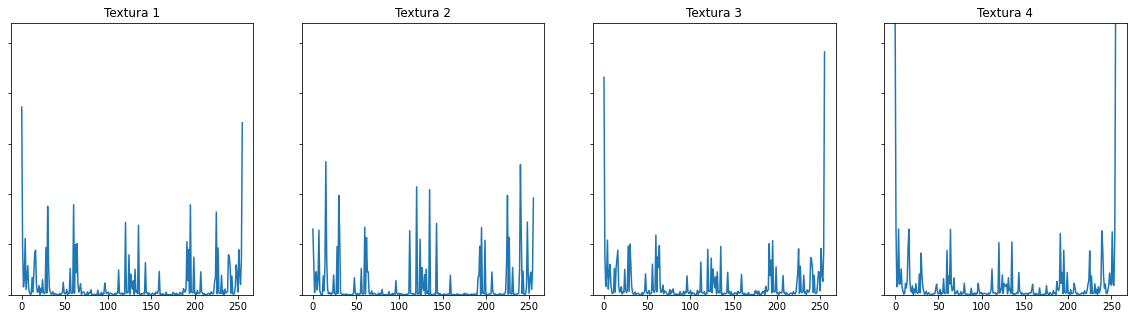

----------------------------------------------------------------
Number of points p: 8, radius: 10
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


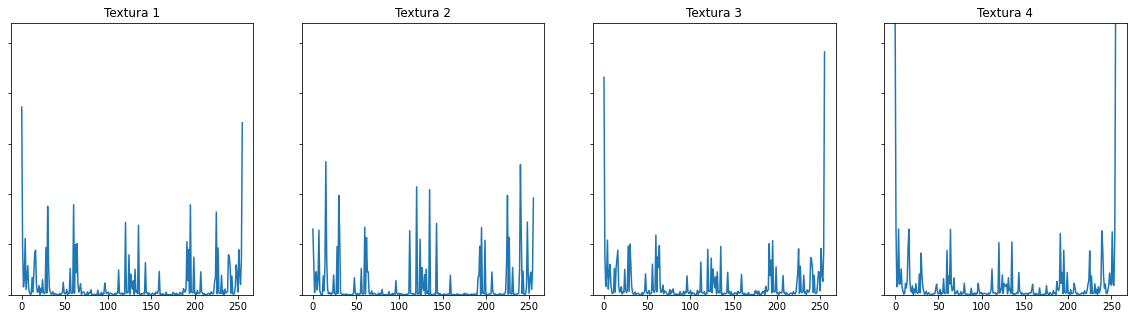

----------------------------------------------------------------
Number of points p: 9, radius: 1
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


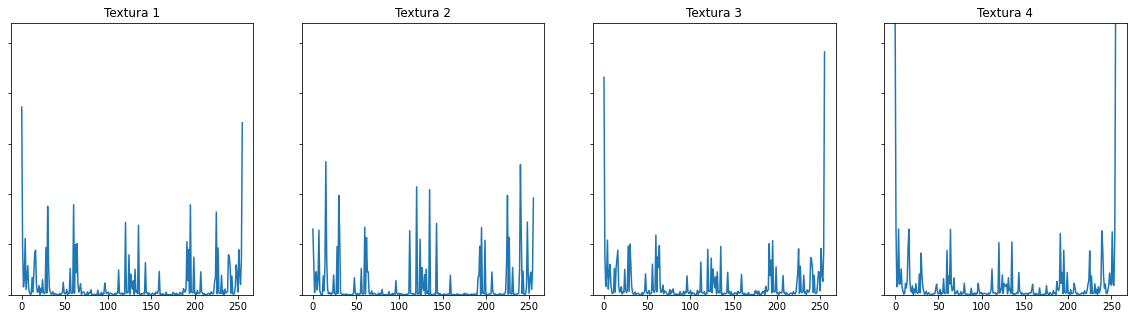

----------------------------------------------------------------
Number of points p: 9, radius: 2
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


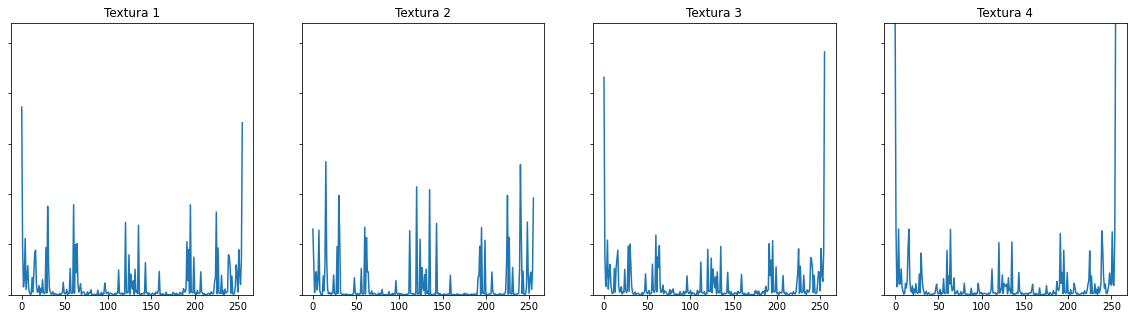

----------------------------------------------------------------
Number of points p: 9, radius: 3
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


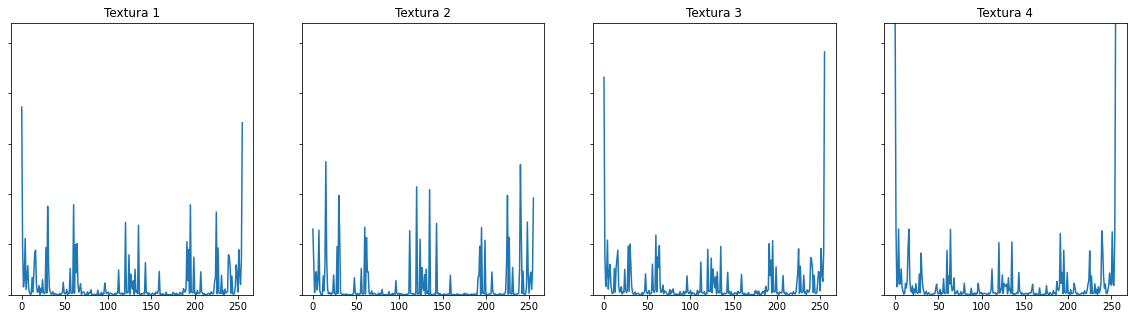

----------------------------------------------------------------
Number of points p: 9, radius: 4
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


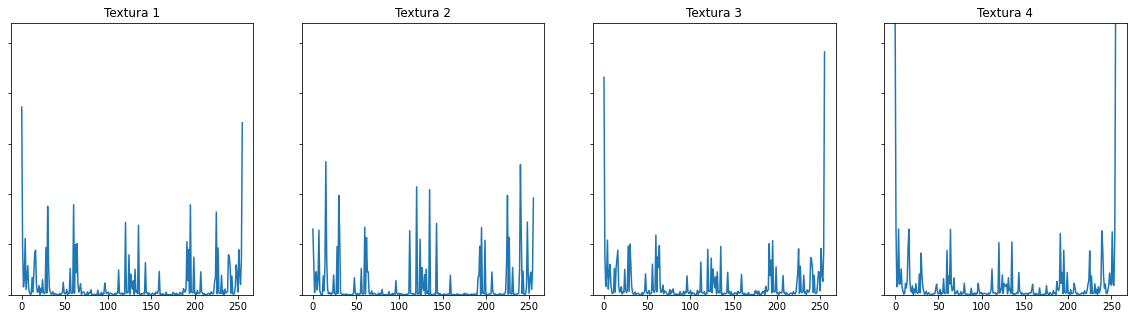

----------------------------------------------------------------
Number of points p: 9, radius: 5
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


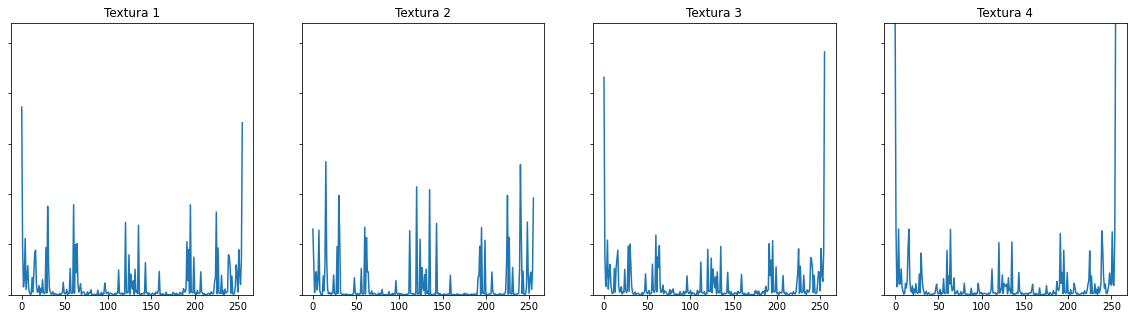

----------------------------------------------------------------
Number of points p: 9, radius: 6
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


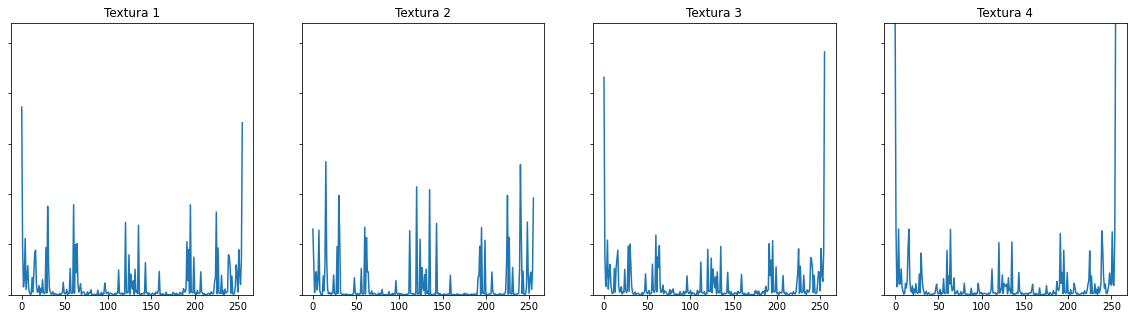

----------------------------------------------------------------
Number of points p: 9, radius: 7
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


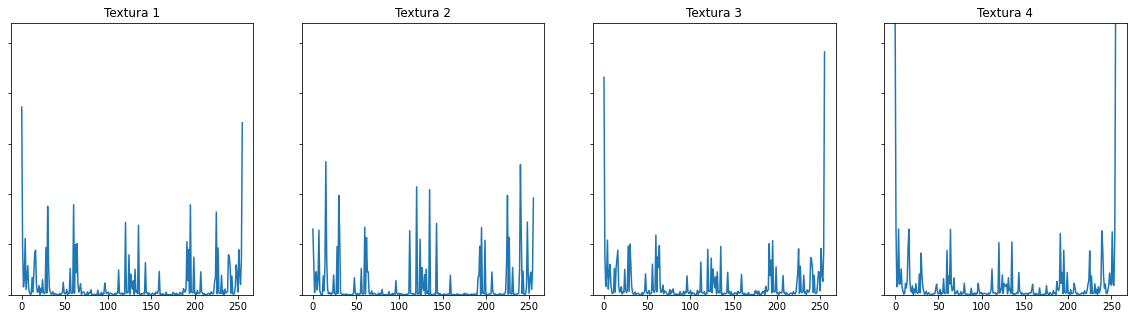

----------------------------------------------------------------
Number of points p: 9, radius: 8
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


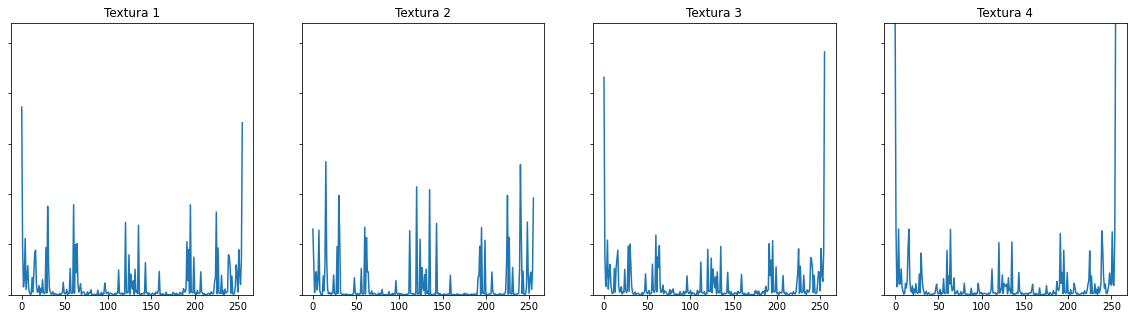

----------------------------------------------------------------
Number of points p: 9, radius: 9
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


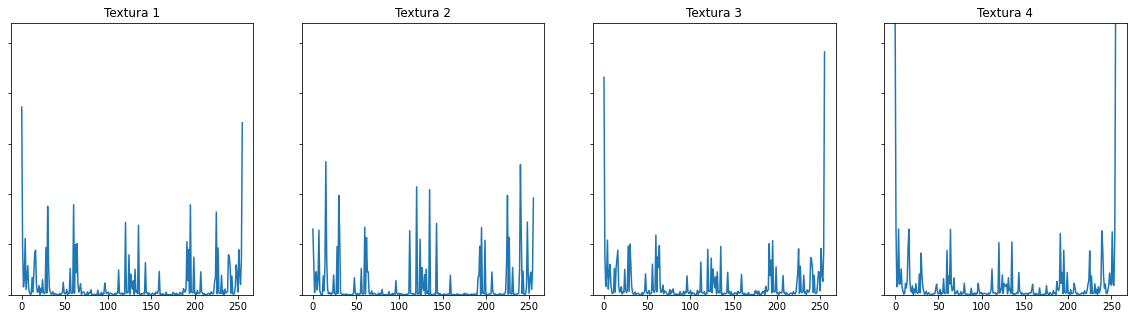

----------------------------------------------------------------
Number of points p: 9, radius: 10
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


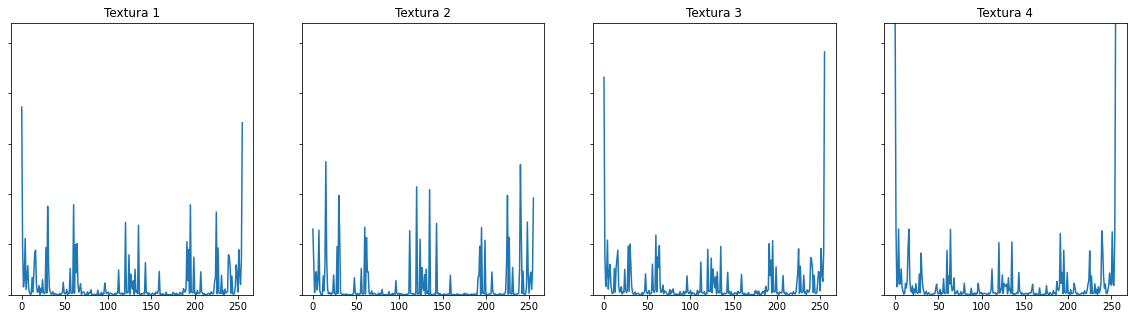

----------------------------------------------------------------
Number of points p: 10, radius: 1
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


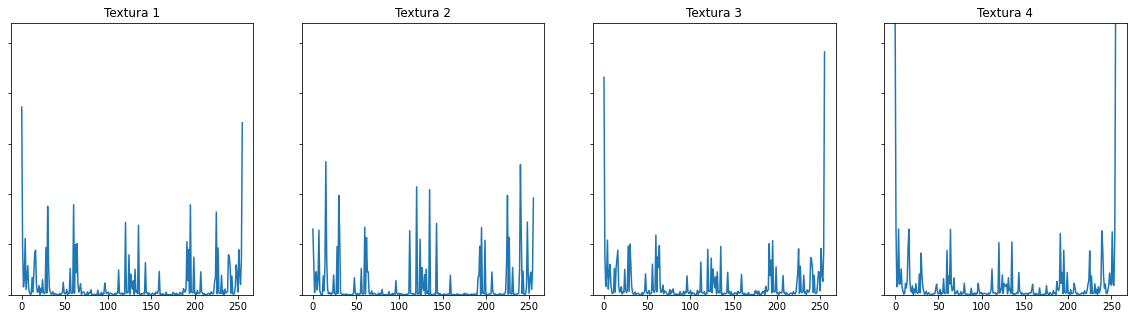

----------------------------------------------------------------
Number of points p: 10, radius: 2
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


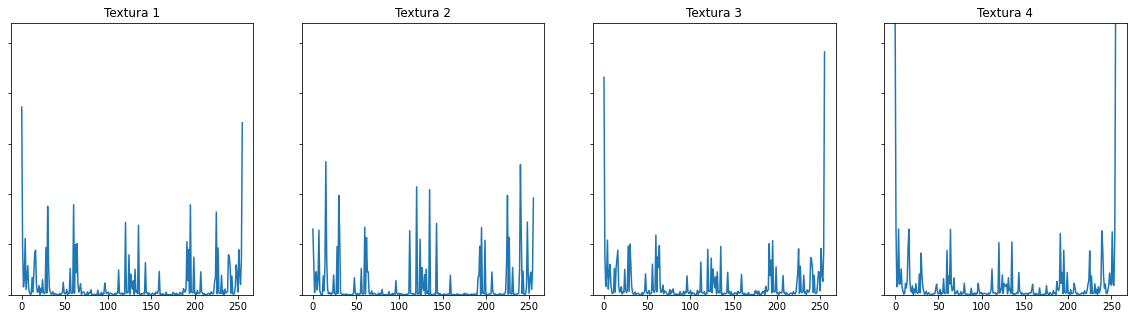

----------------------------------------------------------------
Number of points p: 10, radius: 3
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


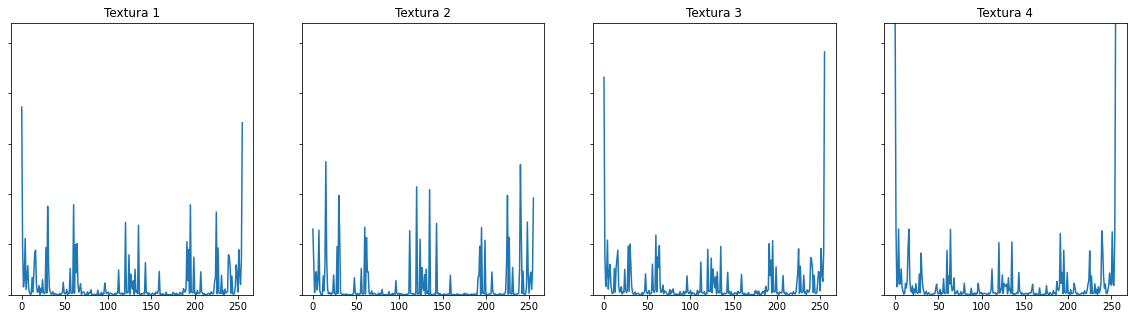

----------------------------------------------------------------
Number of points p: 10, radius: 4
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


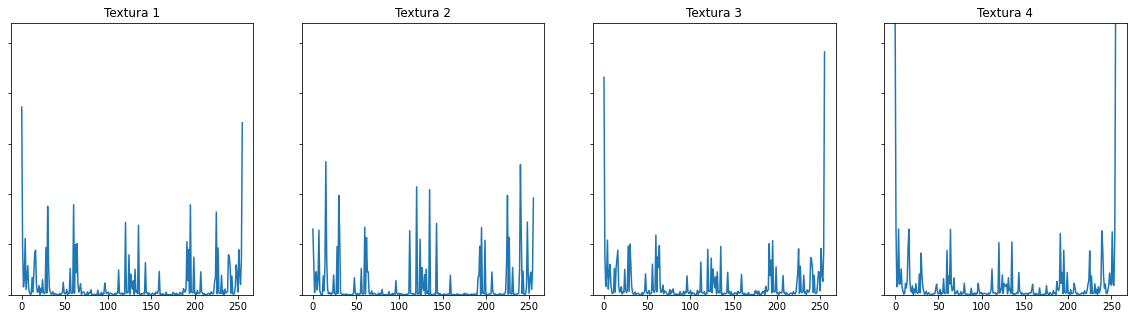

----------------------------------------------------------------
Number of points p: 10, radius: 5
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


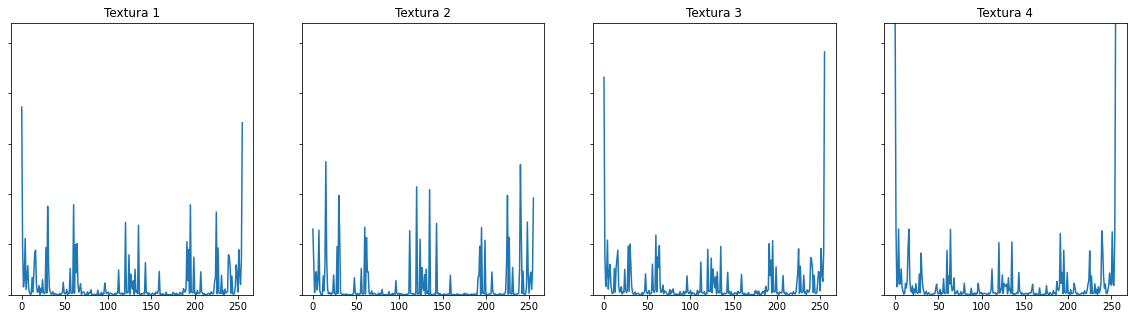

----------------------------------------------------------------
Number of points p: 10, radius: 6
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


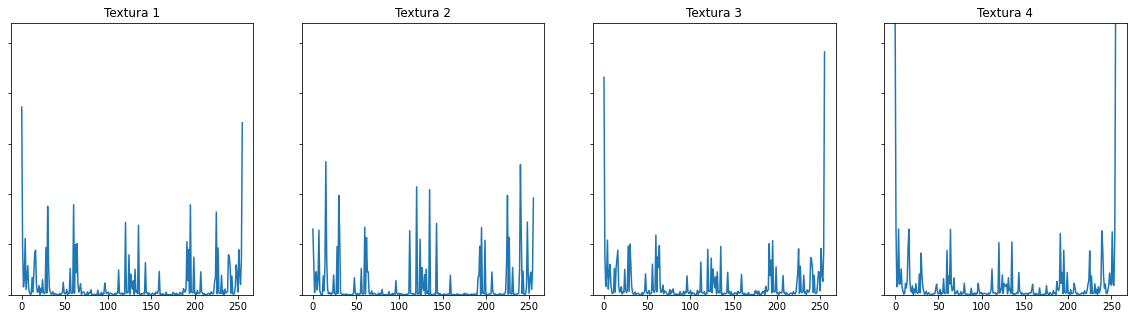

----------------------------------------------------------------
Number of points p: 10, radius: 7
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


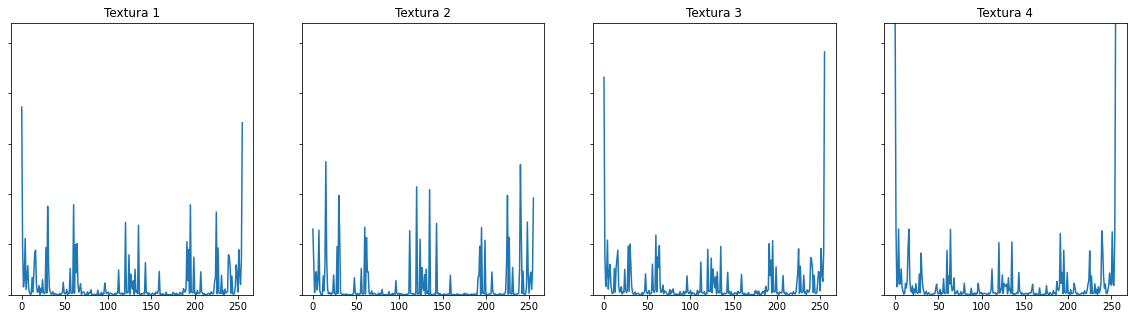

----------------------------------------------------------------
Number of points p: 10, radius: 8
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


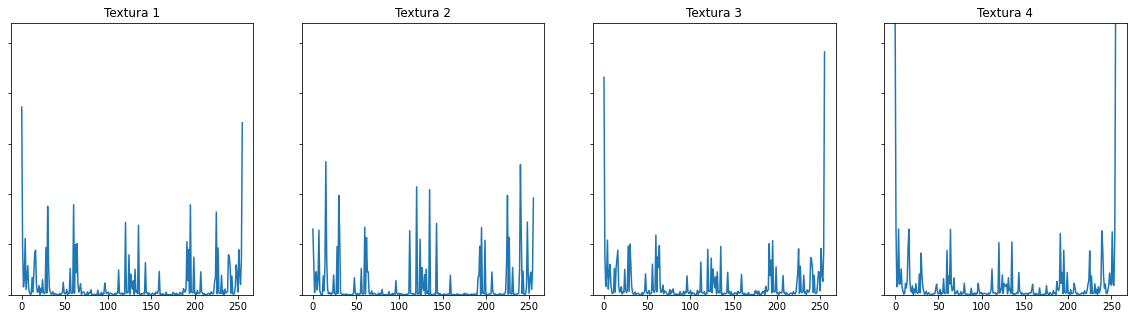

----------------------------------------------------------------
Number of points p: 10, radius: 9
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


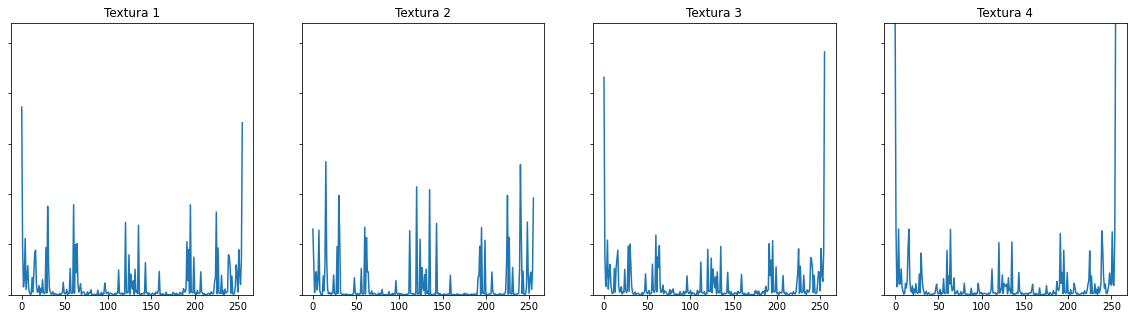

----------------------------------------------------------------
Number of points p: 10, radius: 10
Euclidean distance between Texture 1 e 2: 0.09401748823863659
Euclidean distance between Texture 1 e 3: 0.04686792918554302
Euclidean distance between Texture 1 e 4: 0.08349749496648862
Euclidean distance between Texture 2 e 3: 0.1208887940974727
Euclidean distance between Texture 2 e 4: 0.15546696758616152
Euclidean distance between Texture 3 e 4: 0.051686365748515074


Texture 1: ['entropy': [[21.36894938]], 'contrast':[[820.90697407]], 'angular moment': [[7.8238069e-05]]]
Texture 2: ['entropy': [[9.38532488]], 'contrast':[[185.45407814]], 'angular moment': [[0.00038938]]]
Texture 3: ['entropy': [[13.81283798]], 'contrast':[[360.16058579]], 'angular moment': [[0.00012141]]]
Texture 4: ['entropy': [[25.69465686]], 'contrast':[[1406.50430672]], 'angular moment': [[5.53038863e-05]]]


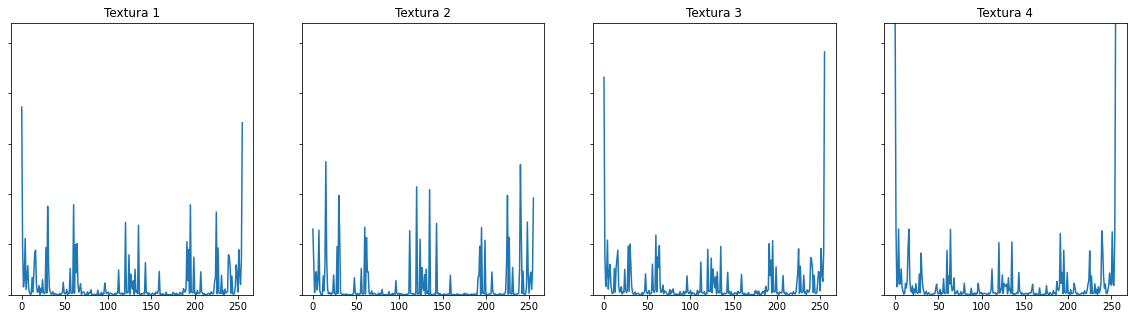

----------------------------------------------------------------


In [7]:
from itertools import product
from scipy.spatial import distance
from skimage.feature import greycomatrix, greycoprops

def comparation_of_textures():
    p = [1,2,3,4,5,6,7,8, 9, 10]
    r = [1,2,3,4,5,6,7,8,9,10]
    
    hmax = max([hist_1.max(), hist_2.max(), hist_3.max(), hist_4.max()])
    fig, ax = plt.subplots(1, 4, figsize=(20,10))
    ax[0].imshow(cv2.cvtColor(text_5, cv2.COLOR_BGR2RGB))
    ax[0].axis('off')
    ax[0].set_title('Textura 1')
    ax[1].imshow(cv2.cvtColor(text_6, cv2.COLOR_BGR2RGB))
    ax[1].axis('off')
    ax[1].set_title('Textura 2')
    ax[2].imshow(cv2.cvtColor(text_7, cv2.COLOR_BGR2RGB))
    ax[2].axis('off')
    ax[2].set_title('Textura 3')
    ax[3].imshow(cv2.cvtColor(text_8, cv2.COLOR_BGR2RGB))
    ax[3].axis('off')
    ax[3].set_title('Textura 4')
    
    plt.show(fig)
    
    for p,r in product(p, r):
        
        print("Number of points p: {}, radius: {}".format(p, r))
        
        hist_5, patterns_5 = lbp_histogram(gray_5)
        hist_6, patterns_6 = lbp_histogram(gray_6)
        hist_7, patterns_7 = lbp_histogram(gray_7)
        hist_8, patterns_8 = lbp_histogram(gray_8)
        
        print("Euclidean distance between Texture 1 e 2: {}". format(distance.euclidean(hist_5, hist_6)))
        print("Euclidean distance between Texture 1 e 3: {}". format(distance.euclidean(hist_5, hist_7)))
        print("Euclidean distance between Texture 1 e 4: {}". format(distance.euclidean(hist_5, hist_8)))
        print("Euclidean distance between Texture 2 e 3: {}". format(distance.euclidean(hist_6, hist_7)))
        print("Euclidean distance between Texture 2 e 4: {}". format(distance.euclidean(hist_6, hist_8)))
        print("Euclidean distance between Texture 3 e 4: {}". format(distance.euclidean(hist_7, hist_8)))
        
        
        print('\n')
        
        print("Texture 1: ['entropy': {}, 'contrast':{}, 'angular moment': {}]".format(greycoprops(greycomatrix(gray_5, [1], [0]), prop='dissimilarity'), \
                                                                                       greycoprops(greycomatrix(gray_5, [1], [0]), prop='contrast'),\
                                                                                       greycoprops(greycomatrix(gray_5, [1], [0]), prop='ASM')))
        print("Texture 2: ['entropy': {}, 'contrast':{}, 'angular moment': {}]".format(greycoprops(greycomatrix(gray_6, [1], [0]), prop='dissimilarity'), \
                                                                                       greycoprops(greycomatrix(gray_6, [1], [0]), prop='contrast'),\
                                                                                       greycoprops(greycomatrix(gray_6, [1], [0]), prop='ASM')))
        print("Texture 3: ['entropy': {}, 'contrast':{}, 'angular moment': {}]".format(greycoprops(greycomatrix(gray_7, [1], [0]), prop='dissimilarity'), \
                                                                                       greycoprops(greycomatrix(gray_7, [1], [0]), prop='contrast'),\
                                                                                       greycoprops(greycomatrix(gray_7, [1], [0]), prop='ASM')))
        print("Texture 4: ['entropy': {}, 'contrast':{}, 'angular moment': {}]".format(greycoprops(greycomatrix(gray_8, [1], [0]), prop='dissimilarity'), \
                                                                                       greycoprops(greycomatrix(gray_8, [1], [0]), prop='contrast'),\
                                                                                       greycoprops(greycomatrix(gray_8, [1], [0]), prop='ASM')))
        hmax = max([hist_1.max(), hist_2.max(), hist_3.max(), hist_4.max()])
        fig, ax = plt.subplots(1, 4, figsize=(20,5))
        ax[0].plot(hist_5)
        ax[0].set_ylim([0, hmax])
        ax[0].set_title('Textura 1')
        ax[0].axes.yaxis.set_ticklabels([])
        
        ax[1].plot(hist_6)
        ax[1].set_ylim([0, hmax])
        ax[1].set_title('Textura 2')
        ax[1].axes.yaxis.set_ticklabels([])

        
        ax[2].plot(hist_7)
        ax[2].set_ylim([0, hmax])
        ax[2].set_title('Textura 3')
        ax[2].axes.yaxis.set_ticklabels([])

       
        ax[3].plot(hist_8)
        ax[3].set_ylim([0, hmax])
        ax[3].set_title('Textura 4')
        ax[3].axes.yaxis.set_ticklabels([])


        plt.show(fig)
        print("----------------------------------------------------------------")

        
comparation_of_textures()